# Diabetes Diagnosis

In [25]:
# Import required libraries for data handling, visualization, and preprocessing
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import re
import dataframe_image as dfi
import textwrap
from textwrap import fill
from scipy.stats import chi2_contingency
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import PowerTransformer

## Step 2: Data Description

In [26]:
# Load the CSV file into a DataFrame
df = pd.read_csv('diabetes_diagnosis.csv')

### **1. Number of Attributes and Instance:**  Inspect the dataset to indentify the number of rows(instances) and columns(attibutes) available for analysis.

In [27]:
# Display the number of instances (rows) and attributes (columns)
print("Number of instances (rows):", df.shape[0])
print("Number of attributes (columns):", df.shape[1])

# Create a simple overview table for easier presentation in the report
overview_table = pd.DataFrame({
    "Count": [df.shape[0], df.shape[1]]
}, index=["Instances (rows)", "Attributes (columns)"])

# Display the overview table
display(overview_table)

Number of instances (rows): 264802
Number of attributes (columns): 23


,Count
Instances (rows),264802
Attributes (columns),23


### **2. Data Types of Each Attribute:**  
This step inspects and summarizes the data types of all attributes in the dataset.  

- Extract the data type of each attribute and classify them as *Numerical* or *Categorical*.  
- Display the complete attribute table, showing both the raw data types and their classification.  
- Generate summary statistics of attribute categories and detailed data types.  
- Visualize both summaries with stacked bar charts, embedding labels directly within each bar for clarity.  


,Data Type,Attribute Category
Unnamed: 0,int64,Numerical
CholCheck,float64,Numerical
BMI,float64,Numerical
Smoker,float64,Numerical
Stroke,float64,Numerical
HeartDiseaseorAttack,float64,Numerical
PhysActivity,float64,Numerical
Fruits,float64,Numerical
Veggies,float64,Numerical
AnyHealthcare,float64,Numerical


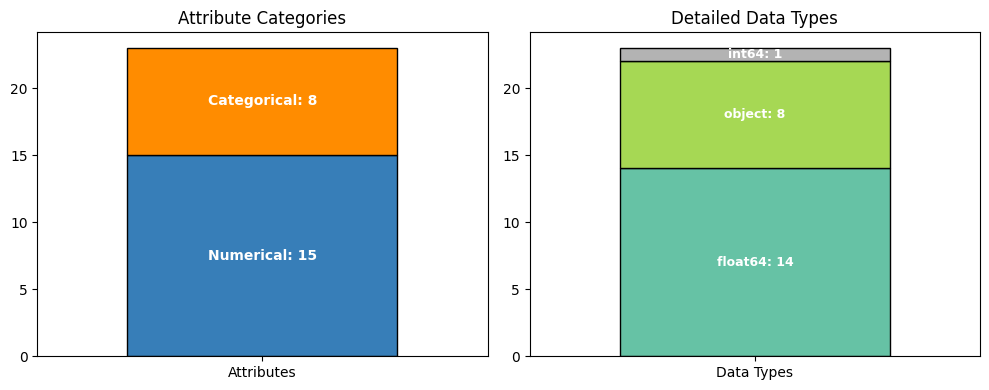

In [28]:
# 2) Data Types of Each Attribute:
# Identify each attribute's data type, classify as Numerical or Categorical,
# and summarize with stacked bar chart visualizations.

# Extract data types
attribute_types = pd.DataFrame(df.dtypes, columns=["Data Type"])

# Add classification column
attribute_types["Attribute Category"] = attribute_types["Data Type"].apply(
    lambda x: "Numerical" if np.issubdtype(x, np.number) else "Categorical"
)

# Display full attribute table
display(attribute_types)

# --- Summary Counts ---
category_counts = attribute_types["Attribute Category"].value_counts()
dtype_counts = attribute_types["Data Type"].value_counts()

# --- Visualization: Stacked Bar Charts ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Fixed colors
cat_palette = {"Numerical": "#377eb8", "Categorical": "#ff8c00"}
dtype_colors = plt.cm.Set2(np.linspace(0, 1, len(dtype_counts)))

x_pos = 0
bar_width = 0.6  # 60% width
x_limits = (-0.5, 0.5)  # keep bars centered

# ---------- Plot 1: Attribute Category ----------
bottom = 0
for category, count in category_counts.items():
    color = cat_palette.get(category, None)
    axes[0].bar(x_pos, count, bottom=bottom, width=bar_width, color=color, edgecolor="black")
    axes[0].text(x_pos, bottom + count/2, f"{category}: {count}",
                 ha="center", va="center", fontsize=10, color="white", fontweight="bold")
    bottom += count

axes[0].set_xlim(x_limits)
axes[0].set_xticks([x_pos])
axes[0].set_xticklabels(["Attributes"])
axes[0].set_title("Attribute Categories")

# ---------- Plot 2: Detailed Data Types ----------
bottom = 0
for (dtype, count), color in zip(dtype_counts.items(), dtype_colors):
    axes[1].bar(x_pos, count, bottom=bottom, width=bar_width, color=color, edgecolor="black")
    axes[1].text(x_pos, bottom + count/2, f"{dtype}: {count}",
                 ha="center", va="center", fontsize=9, color="white", fontweight="bold")
    bottom += count

axes[1].set_xlim(x_limits)
axes[1].set_xticks([x_pos])
axes[1].set_xticklabels(["Data Types"])
axes[1].set_title("Detailed Data Types")

plt.tight_layout()
plt.show()


### **3. Presence and Proportion of Missing Values**  
This step summarizes missing values across all attributes.  

- Pie chart: shows attributes with missing values (count) vs. those without (names listed).  
- Bar chart: top 10 attributes by missing percentage, with values annotated above bars.  
- Table: all attributes with their missing rates (%) to two decimals.  


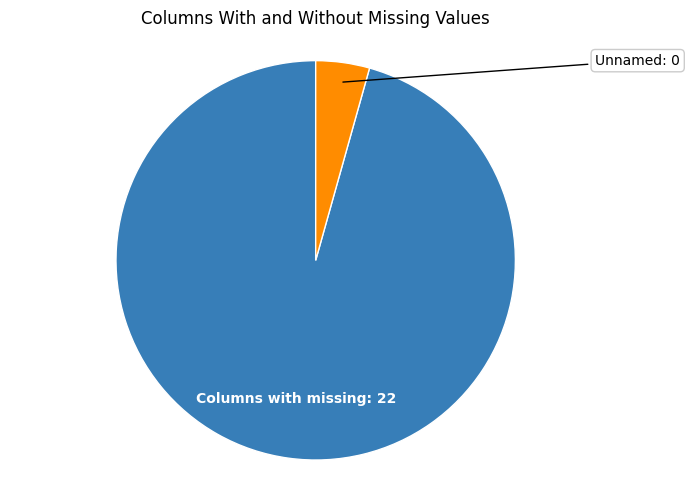

/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/4008650141.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top10.index, rotation=45, ha="right")


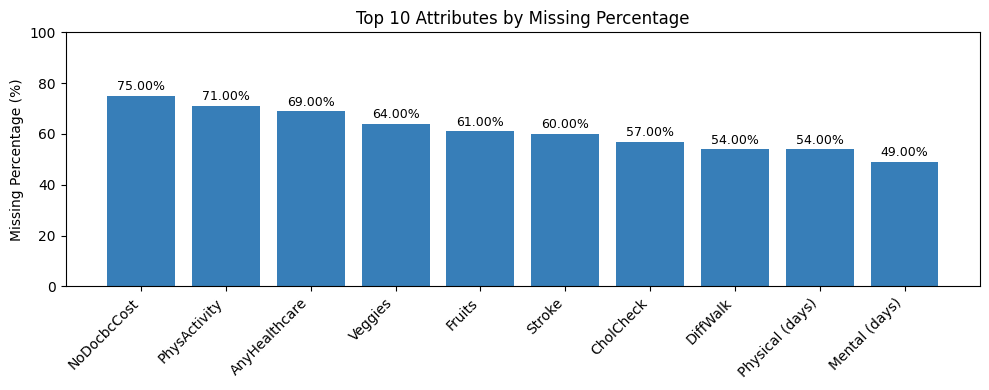

,Attribute,Missing Rate (%)
0,Unnamed: 0,0.00%
1,CholCheck,57.00%
2,BMI,33.00%
3,Smoker,45.00%
4,Stroke,60.00%
5,HeartDiseaseorAttack,27.00%
6,PhysActivity,71.00%
7,Fruits,61.00%
8,Veggies,64.00%
9,AnyHealthcare,69.00%


In [29]:
# ---  Pie chart: columns with missing vs without (custom labels) ---


# Recalculate missing info
missing_counts = df.isnull().sum()
cols_with_missing = missing_counts[missing_counts > 0].index.tolist()
cols_without_missing = missing_counts[missing_counts == 0].index.tolist()

sizes = [len(cols_with_missing), len(cols_without_missing)]
colors = ["#377eb8", "#ff8c00"]

fig, ax = plt.subplots(figsize=(7, 5))
wedges, _ = ax.pie(
    sizes, labels=None, autopct=None, startangle=90,
    colors=colors, wedgeprops=dict(edgecolor="white")
)
ax.axis("equal")
ax.set_title("Columns With and Without Missing Values", pad=12)

# Label inside for "with missing"
if sizes[0] > 0:
    w0 = wedges[0]
    ang = (w0.theta2 + w0.theta1) / 2.0
    x = 0.7 * np.cos(np.deg2rad(ang))
    y = 0.7 * np.sin(np.deg2rad(ang))
    ax.text(x, y, f"Columns with missing: {sizes[0]}",
            ha="center", va="center", fontsize=10,
            color="white", fontweight="bold")

# Annotate "no missing" with line + names
if sizes[1] > 0:
    w1 = wedges[1]
    ang1 = (w1.theta2 + w1.theta1) / 2.0
    x1 = 0.9 * np.cos(np.deg2rad(ang1))
    y1 = 0.9 * np.sin(np.deg2rad(ang1))
    names_text_wrapped = textwrap.fill(", ".join(cols_without_missing), width=40)
    ax.annotate(
        names_text_wrapped,
        xy=(x1, y1), xytext=(1.4, 1.0), textcoords="data",
        arrowprops=dict(arrowstyle="-", lw=1.0),
        ha="left", va="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#cccccc")
    )

plt.tight_layout()
plt.show()

# ---  Bar plot: top-10 columns by missing percentage ---

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
top10 = (missing_percent[missing_percent > 0]
         .sort_values(ascending=False)
         .head(10))

fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(top10.index, top10.values, color="#377eb8")

ax.set_ylim(0, 100)
ax.set_ylabel("Missing Percentage (%)")
ax.set_title("Top 10 Attributes by Missing Percentage")

for rect, val in zip(bars, top10.values):
    ax.text(rect.get_x() + rect.get_width()/2, val + 1,
            f"{val:.2f}%", ha="center", va="bottom", fontsize=9)

ax.set_xticklabels(top10.index, rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---  Full table of missing rates (without Rank column) ---


missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Keep original column order
full_table = pd.DataFrame({
    "Attribute": df.columns,
    "Missing Rate (%)": missing_percent.values
})

# Format percentage to two decimals with % symbol
full_table["Missing Rate (%)"] = full_table["Missing Rate (%)"].map(lambda x: f"{x:.2f}%")

display(full_table)


### **4. Unique Values and Distributions of Features**  

- A summary table reports the number of unique values for each categorical attribute,  
  providing an overview of the diversity within categorical features.  

- Horizontal boxplots are used to visualize the distributions of numerical attributes.  
  Each attribute is shown in a separate subplot, with distinct colors for clarity.  


,Attribute,Unique Values
0,GeneralHealth,5
1,Sex,2
2,Education,6
3,Income,90184
4,Diabetes,3
5,BloodPressure,2
6,Cholesterol,2
7,Alcoholic,2


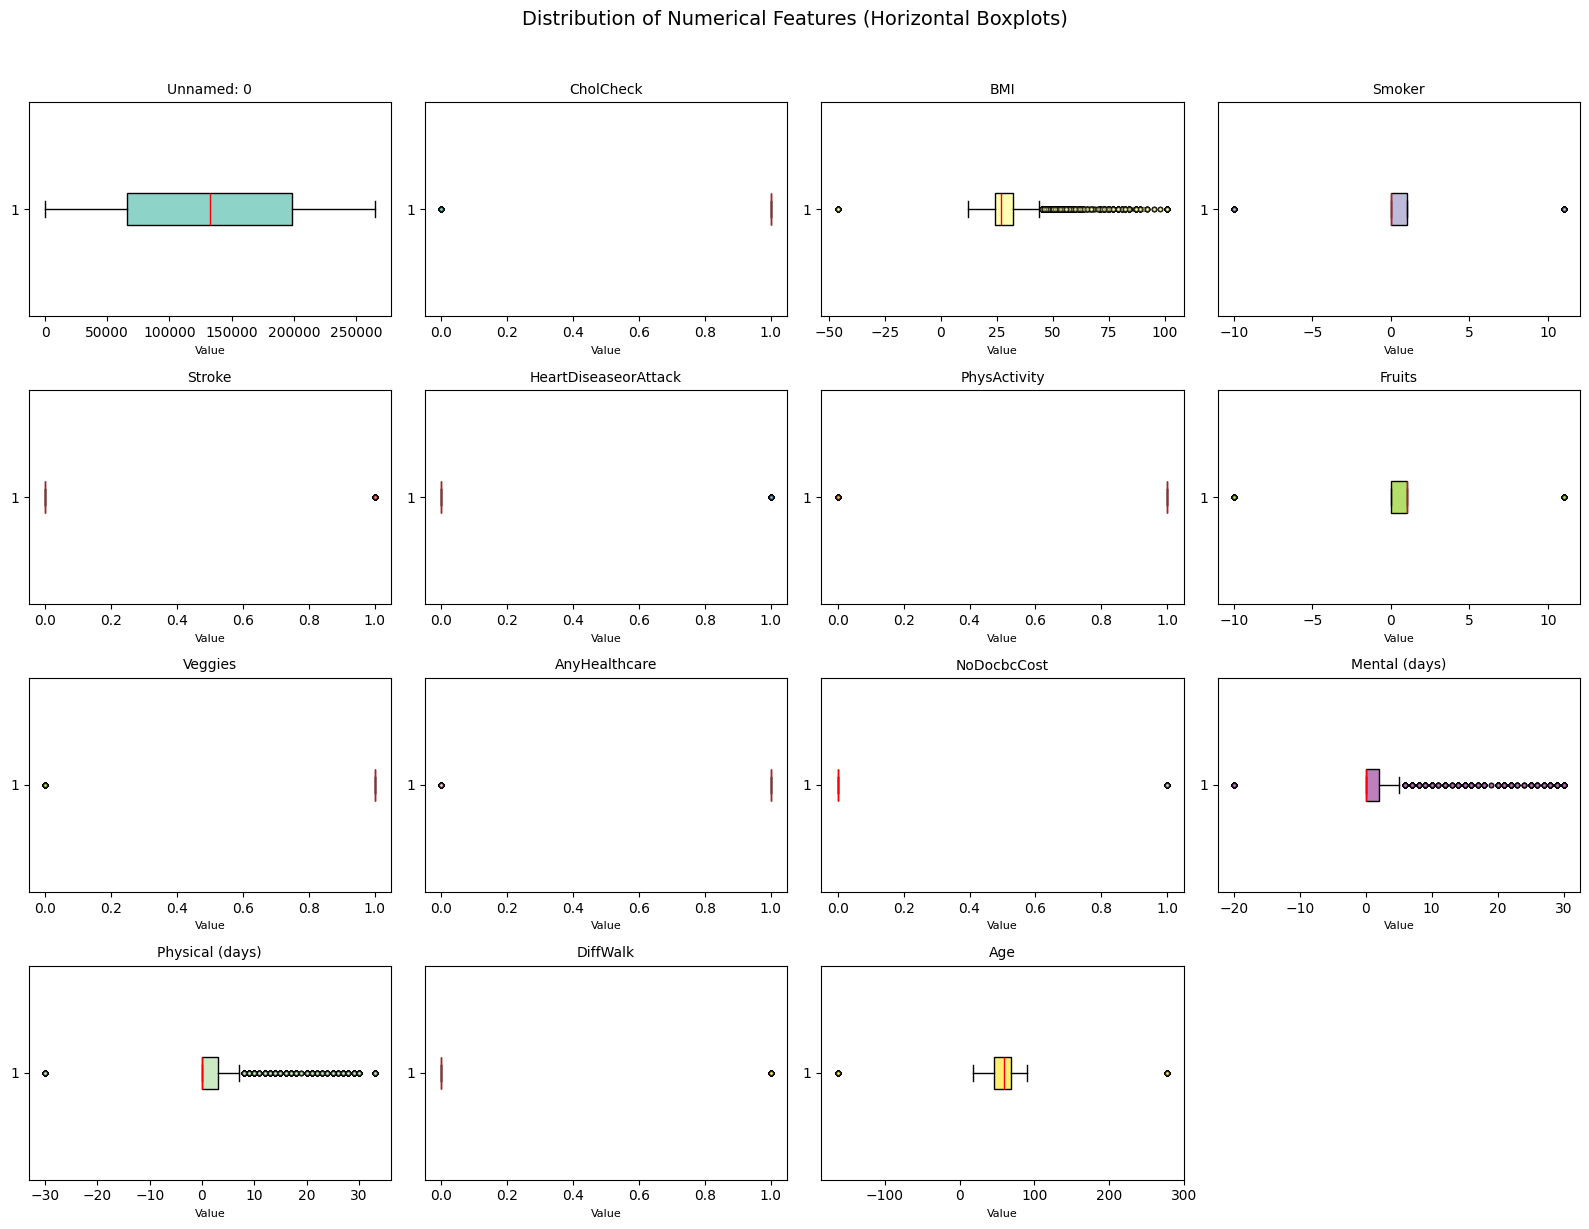

In [30]:
# Unique Values for Categorical Features ---
# Count unique values for each categorical attribute and display as a DataFrame
categorical_cols = attribute_types[attribute_types["Attribute Category"] == "Categorical"].index
unique_values = df[categorical_cols].nunique().reset_index()
unique_values.columns = ["Attribute", "Unique Values"]

display(unique_values)

# Distribution of Numerical Features (Horizontal Boxplots) ---
# Select numerical attributes
numerical_cols = attribute_types[attribute_types["Attribute Category"] == "Numerical"].index

# Subplot grid: 4 columns layout
n = len(numerical_cols)
ncols = 4
nrows = (n + ncols - 1) // ncols  # ceil division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 3 * nrows))
axes = axes.flatten()

# Choose a colormap to generate distinct colors
colors = plt.cm.Set3(np.linspace(0, 1, len(numerical_cols)))

for i, (col, color) in enumerate(zip(numerical_cols, colors)):
    axes[i].boxplot(df[col].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor=color, color="black"),
                    medianprops=dict(color="red"),
                    whiskerprops=dict(color="black"),
                    capprops=dict(color="black"),
                    flierprops=dict(markerfacecolor=color, marker='o', markersize=3, alpha=0.5))
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_xlabel("Value", fontsize=8)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Features (Horizontal Boxplots)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()



## Step 3: Data Cleaning and Processing

### **1. Removal of Irrelevant Columns**  
Irrelevant or high-missing attributes were removed to retain features meaningful for diabetes analysis.  

- Columns with minimal analytical value (e.g., index columns).  
- Columns largely unrelated to the research question.  
- Columns with excessive missing values (above ~50%).  

A summary table was generated to compare the total number of columns before and after removal, along with the number of columns dropped.  

Removed Columns:
['Unnamed: 0', 'NoDocbcCost', 'AnyHealthcare', 'DiffWalk', 'Physical (days)', 'Mental (days)']


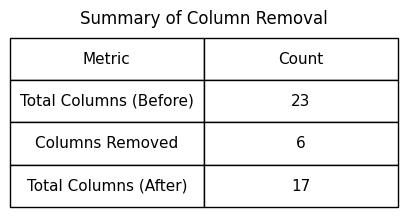

CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
GeneralHealth            object
Sex                      object
Age                     float64
Education                object
Income                   object
Diabetes                 object
BloodPressure            object
Cholesterol              object
Alcoholic                object
dtype: object

In [31]:
# 3.1 Removal of Irrelevant Columns:
# Drop irrelevant or high-missing columns while keeping important features for diabetes analysis.

# Columns identified as irrelevant or unsuitable for analysis
columns_to_drop = [
    "Unnamed: 0",      # index column, no analytical value
    
    # Largely unrelated to the research question
    "NoDocbcCost",     # ~75% missing
    "AnyHealthcare",   # ~69% missing
    "DiffWalk",        # ~54% missing
    "Physical (days)", # ~54% missing
    "Mental (days)"    # ~49% missing
]


# Drop columns from dataset
df_cleaned = df.drop(columns=columns_to_drop)

# Print removed columns
print("Removed Columns:")
print(columns_to_drop)

# Create a simple summary table: before vs after column removal
removal_summary = pd.DataFrame({
    "Metric": ["Total Columns (Before)", 
               "Columns Removed", 
               "Total Columns (After)"],
    "Count": [df.shape[1], 
              len(columns_to_drop), 
              df_cleaned.shape[1]]
})

# --- Output as a compact but readable white-background table ---
fig, ax = plt.subplots(figsize=(5, 2.2))
ax.axis('off')

table = ax.table(cellText=removal_summary.values,
                 colLabels=removal_summary.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2)

# Adjust column widths
for key, cell in table.get_celld().items():
    cell.set_height(0.3)
    cell.set_width(0.5)

plt.title("Summary of Column Removal", fontsize=12, pad=10)
plt.show()
display(df_cleaned.dtypes)

### **2. Formatting and Type Conversion**  
This step standardizes and transforms attributes to ensure consistency for analysis.  

- Standardized column names for clarity.  
- Replaced common placeholders with `NaN` to unify missing values.  
- Converted *income* into a numeric format by removing symbols (`$`, `,`).  
- Recoded binary categorical features (e.g., Yes/No) into 0/1 values.  
- Visualized unique levels of categorical attributes using mosaic-style horizontal strips.  
- Compared attribute data types before and after formatting, with an additional table highlighting only those that changed.  


/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/4221064475.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0, True: 1, False: 0})
/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/4221064475.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0, True: 1, False: 0})
/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/4221064475.py:46: FutureWarning: Downcasting behavior in `replace` is depreca

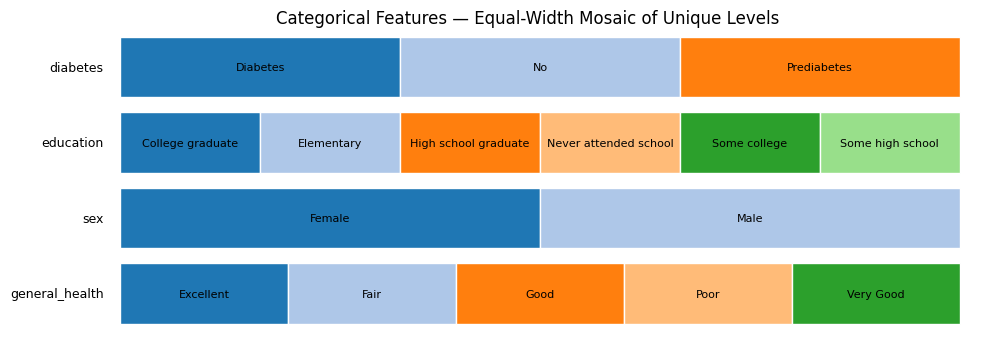

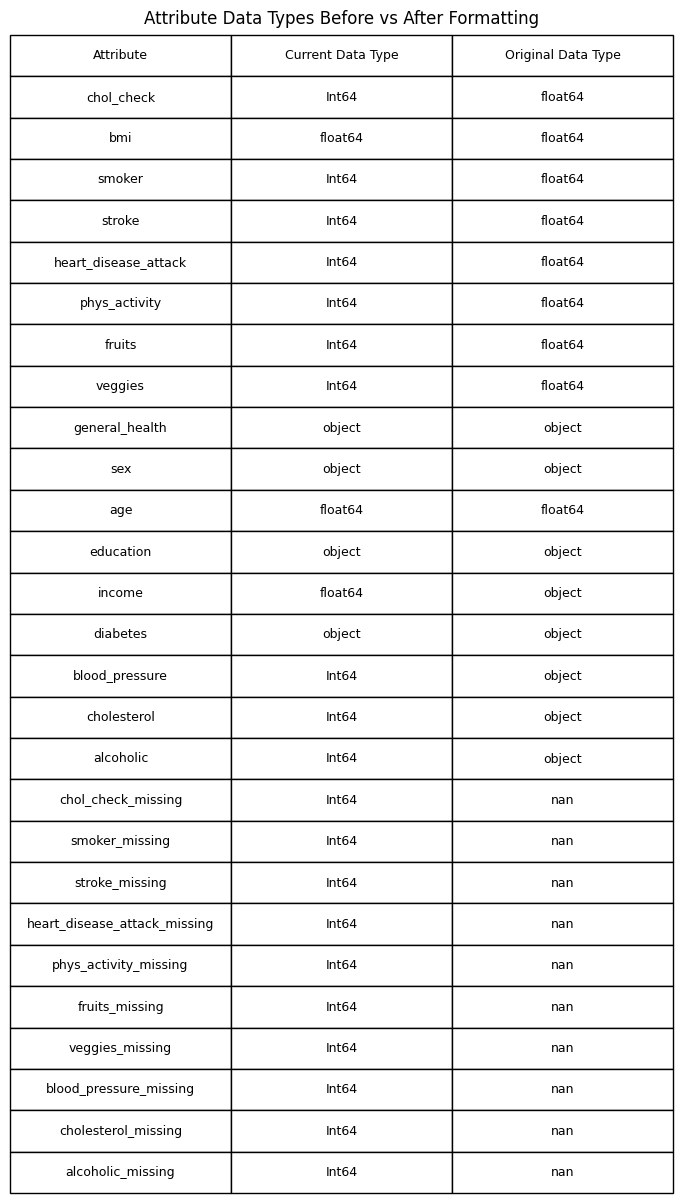

'Show the attributes with datatype changed:'

,Attribute,Original Data Type,Current Data Type
0,chol_check,float64,Int64
1,smoker,float64,Int64
2,stroke,float64,Int64
3,heart_disease_attack,float64,Int64
4,phys_activity,float64,Int64
5,fruits,float64,Int64
6,veggies,float64,Int64
7,income,object,float64
8,blood_pressure,object,Int64
9,cholesterol,object,Int64


In [32]:
# 3.2 Formatting and Type Conversion
# --- Snapshot BEFORE formatting ---
before_df = df_cleaned.copy(deep=True)

# Step 1: Standardize column names FIRST
before_df.columns = [
    "chol_check", "bmi", "smoker", "stroke", "heart_disease_attack",
    "phys_activity", "fruits", "veggies", "general_health", "sex",
    "age", "education", "income", "diabetes", "blood_pressure",
    "cholesterol", "alcoholic"
]

# Then record original dtypes with standardized names
before_dtypes = before_df.dtypes.to_frame(name="Original Data Type")

# Work on a fresh copy
formatted = before_df.copy(deep=True)



# --- 2) Standardize missing value representations ---
formatted = formatted.replace(
    ["", "NA", "N/A", "Unknown", "missing", "Missing", "."], np.nan
)

# --- 3) Convert 'income' to numeric ---
if "income" in formatted.columns:
    formatted["income"] = (
        formatted["income"]
        .astype(str)
        .replace(r"[\$,]", "", regex=True)
        .replace({"nan": np.nan})
        .astype(float)
    )

# --- 4) Convert binary categorical variables to 0/1 (except 'sex') ---
binary_cols = [
    "chol_check", "smoker", "stroke", "heart_disease_attack",
    "phys_activity", "fruits", "veggies", "blood_pressure",
    "cholesterol", "alcoholic"
]
for col in binary_cols:
    if col in formatted.columns:
        formatted[col] = (
            formatted[col]
            .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0, True: 1, False: 0})
            .astype("Int64")
        )
        formatted[f"{col}_missing"] = formatted[col].isna().astype("Int64")
        formatted[col] = formatted[col].fillna(0)

# --- 5) Mosaic-like / horizontal strip plot for categorical features ---
categorical_cols = [
    c for c in formatted.columns
    if getattr(formatted[c].dtype, "name", "") in ["object", "category"]
]
if len(categorical_cols) == 0:
    print("No categorical features to visualize in mosaic-like plot.")
else:
    cats_per_feature = []
    for c in categorical_cols:
        vals = formatted[c].dropna().astype(str).unique().tolist()
        vals = sorted(vals)
        cats_per_feature.append((c, vals))

    m = len(cats_per_feature)
    fig_height = max(2.5, 0.6 * m + 1.2)
    fig, ax = plt.subplots(figsize=(10, fig_height))

    palette = plt.cm.tab20.colors
    palette_len = len(palette)

    for i, (feat, cats) in enumerate(cats_per_feature):
        n = max(1, len(cats))
        y0 = i
        for j, cat in enumerate(cats):
            x0 = j / n
            w = 1.0 / n
            color = palette[j % palette_len]
            rect = mpatches.Rectangle((x0, y0), w, 0.8, facecolor=color, edgecolor="white")
            ax.add_patch(rect)
            if w > 0.08:
                ax.text(x0 + w/2, y0 + 0.4, cat, ha="center", va="center", fontsize=8, color="black")
        ax.text(-0.02, y0 + 0.4, feat, ha="right", va="center", fontsize=9)

    ax.set_xlim(-0.05, 1.02)
    ax.set_ylim(-0.2, m - 0.2)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title("Categorical Features — Equal-Width Mosaic of Unique Levels", fontsize=12, pad=10)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
    plt.tight_layout()
    plt.show()

# --- 6) Verify data types (before vs after) ---
after_dtypes = pd.DataFrame(formatted.dtypes, columns=["Current Data Type"])
dtype_compare = (
    after_dtypes.merge(before_dtypes, left_index=True, right_index=True, how="left")
                .reset_index()
                .rename(columns={"index": "Attribute"})
)

rows = len(dtype_compare)
fig, ax = plt.subplots(figsize=(6.8, 0.4 * rows + 1.2))
ax.axis('off')
table = ax.table(
    cellText=dtype_compare.values,
    colLabels=dtype_compare.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.06, 1.06)
plt.title("Attribute Data Types Before vs After Formatting", fontsize=12, pad=8)
plt.tight_layout(pad=0.6)
plt.show()

# Persist changes
df_cleaned = formatted
# --- 7) Table of attributes with changed data types only ---
# Build comparison DataFrame if not already available
if 'dtype_compare' not in globals():
    after_dtypes = pd.DataFrame(df_cleaned.dtypes, columns=["Current Data Type"])
    dtype_compare = (
        after_dtypes.merge(before_dtypes, left_index=True, right_index=True, how="left")
                    .reset_index()
                    .rename(columns={"index": "Attribute"})
    )

# Keep only rows where dtype changed
changed_mask = dtype_compare["Current Data Type"] != dtype_compare["Original Data Type"]
changed_types = dtype_compare.loc[changed_mask, ["Attribute", "Original Data Type", "Current Data Type"]]

if changed_types.empty:
    print("No attributes changed data types.")
else:
    # quick DataFrame view
    display("Show the attributes with datatype changed:",changed_types.reset_index(drop=True))




### **3. Handling Duplicates**  
In this step, the dataset was checked for duplicate records.  
- **Exact duplicates** across all attributes were identified and removed to avoid overcounting.  

In [33]:
# 3.3 Handling Duplicates

# Count duplicate rows
duplicate_count = df_cleaned.duplicated().sum()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Output number of removed rows
print(f"Number of duplicate rows removed: {duplicate_count}")


Number of duplicate rows removed: 7


### **4. Detecting and Handling Outliers**
This step standardizes invalid entries and visualizes potential anomalies.

- **Binary categorical features (0/1):** Set values outside `{0, 1, <NA>}` to `<NA>` and cast columns to `Int64`.  
  *Visualization:* anomaly **heatmap** showing invalid-count per binary feature.

- **Non-binary categorical features:** Normalize strings (trim, collapse spaces, lowercase) and map to an allowed vocabulary; unmapped values → `<NA>`.  
  *Visualization:* **strip plot with labels** displaying the distinct levels per feature; `NA` marked explicitly.

- **Numeric features:**  
  `income` → ensure nullable float; `age` outside **0–120** → `<NA>`; `bmi` outside **10–60** → `<NA>`.  
  *Visualization:* **individual horizontal boxplots** for `age`, `bmi`, and `income`.


/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/3964289038.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<FloatingArray>
[73106.0, 22322.0, 29097.0, 55498.0, 15629.0, 83852.0, 25029.0, 34331.0,
 50825.0, 10279.0,
 ...
    <NA>, 30765.0, 49511.0, 16453.0, 16384.0, 14166.0, 29621.0, 38234.0,
 15659.0, 63709.0]
Length: 264795, dtype: Float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, "income"] = df_cleaned["income"].astype("Float64")
/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/3964289038.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<FloatingArray>
[63.0, 54.0, <NA>, 74.0, <NA>, 66.0, 62.0, <NA>, 62.0, 59.0,
 ...
 41.0, <NA>, 63.0, 29.0, 28.0, 63.0, 75.0, <NA>, <NA>, 48.0]
Length: 264795, dtype: Float64' has dtype incompatible wit

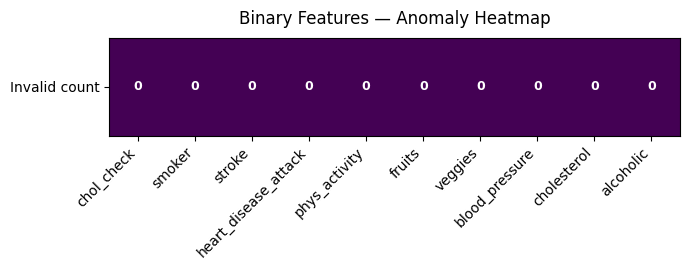

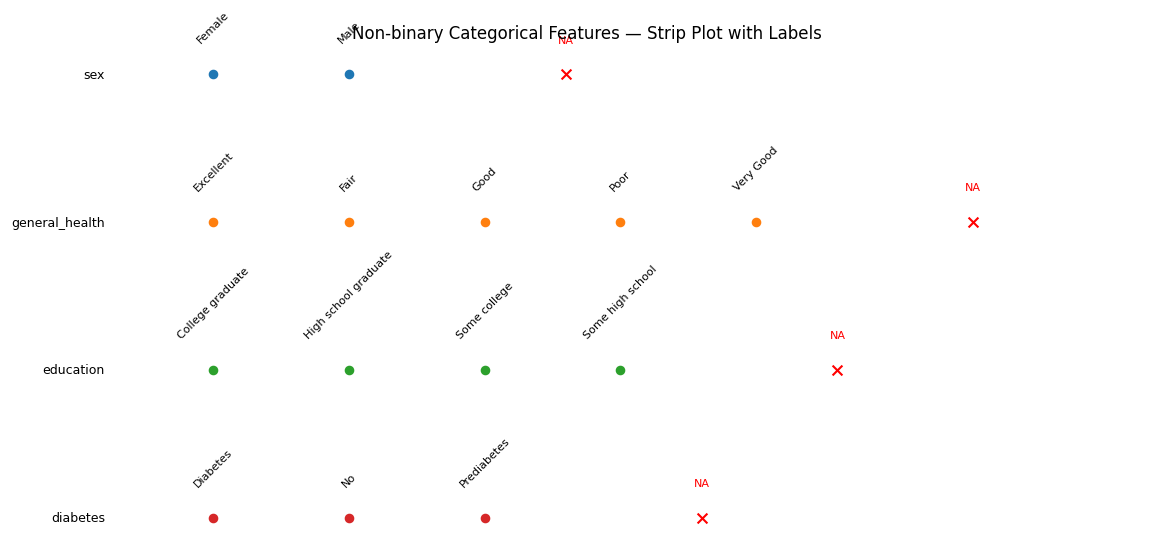

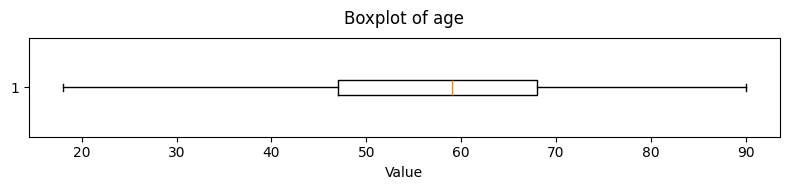

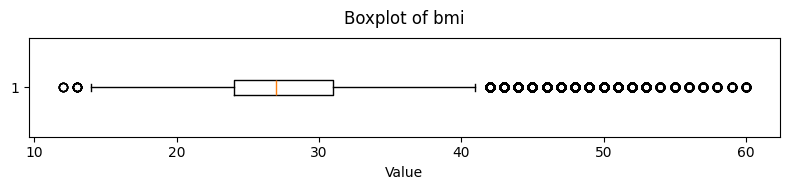

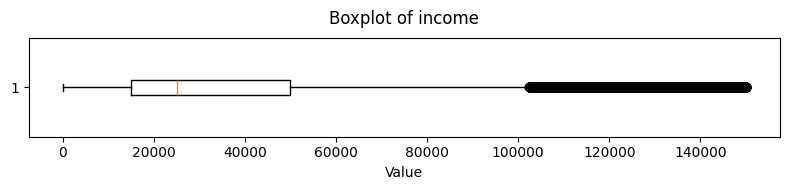

In [34]:
# 3.4 Detecting and Handling Outliers (renumbered 1/2/3; simplified numeric rules)


# Ensure df_cleaned is a true copy (avoid view)
df_cleaned = df_cleaned.copy(deep=True)

# 1) Binary categorical variables
binary_cols = [
    "chol_check", "smoker", "stroke", "heart_disease_attack",
    "phys_activity", "fruits", "veggies",
    "blood_pressure", "cholesterol", "alcoholic"
]
for col in binary_cols:
    if col in df_cleaned.columns:
        s = df_cleaned[col]
        invalid_mask = ~s.isin([0, 1, pd.NA])
        s = s.mask(invalid_mask, pd.NA).astype("Int64")
        df_cleaned.loc[:, col] = s

# 2) Non-binary categorical variables
allowed_maps = {
    "sex": {
        "male": "Male", "female": "Female", "m": "Male", "f": "Female",
        "man": "Male", "woman": "Female"
    },
    "general_health": {
        "excellent": "Excellent", "very good": "Very Good",
        "good": "Good", "fair": "Fair", "poor": "Poor"
    },
    "education": {
        "never attended school or only kindergarten": "Never attended school or only kindergarten",
        "grades 1 through 8 (elementary)": "Grades 1 through 8 (Elementary)",
        "grades 9 through 11 (some high school)": "Some high school",
        "grade 12 or ged (high school graduate)": "High school graduate",
        "some college or technical school": "Some college",
        "college 4 years or more (college graduate)": "College graduate",
        "some high school": "Some high school",
        "high school graduate": "High school graduate",
        "some college": "Some college",
        "college graduate": "College graduate"
    },
    "diabetes": {"no": "No", "prediabetes": "Prediabetes", "diabetes": "Diabetes"}
}
nonbinary_cols = [c for c in ["sex", "general_health", "education", "diabetes"] if c in df_cleaned.columns]

for col in nonbinary_cols:
    s = df_cleaned[col].astype("string")
    s = s.str.strip().str.replace(r"\s+", " ", regex=True).str.lower()
    mapped = s.map(allowed_maps[col])
    df_cleaned.loc[:, col] = mapped.where(mapped.notna(), pd.NA)

# 3) Numeric variables — simplified rules
if "income" in df_cleaned.columns:
    df_cleaned.loc[:, "income"] = df_cleaned["income"].astype("Float64")

if "age" in df_cleaned.columns:
    s = df_cleaned["age"]
    s = s.where(s.isna() | s.between(0, 120), pd.NA).astype("Float64")
    df_cleaned.loc[:, "age"] = s

if "bmi" in df_cleaned.columns:
    s = df_cleaned["bmi"]
    s = s.where(s.isna() | s.between(10, 60), pd.NA).astype("Float64")
    df_cleaned.loc[:, "bmi"] = s


# Plot 1: Heatmap of anomalies in binary categorical columns
import numpy as np
import matplotlib.pyplot as plt

present_binary = [c for c in binary_cols if c in df_cleaned.columns]
if len(present_binary) > 0:
    invalid_counts = []
    for col in present_binary:
        cnt = int((~df_cleaned[col].isin([0, 1, pd.NA])).sum())
        invalid_counts.append(cnt)
    data = np.array([invalid_counts])  # shape (1, N)

    fig, ax = plt.subplots(figsize=(0.5*len(present_binary)+2, 2.8))
    im = ax.imshow(data, aspect="auto")
    ax.set_yticks([0])
    ax.set_yticklabels(["Invalid count"])
    ax.set_xticks(range(len(present_binary)))
    ax.set_xticklabels(present_binary, rotation=45, ha="right")
    ax.set_title("Binary Features — Anomaly Heatmap", pad=10)

    # annotate counts
    for j, v in enumerate(invalid_counts):
        ax.text(j, 0, str(v), ha="center", va="center", fontsize=9, color="white", fontweight="bold")

    plt.tight_layout()
    plt.show()
else:
    print("No binary categorical columns available for heatmap.")

# --- Plot 2: Strip plot with labels for non-binary categorical features ---
present_multi = [c for c in nonbinary_cols if c in df_cleaned.columns]
if len(present_multi) > 0:
    fig, ax = plt.subplots(figsize=(12, 0.9*len(present_multi) + 2))

    y_positions = np.arange(len(present_multi))[::-1]
    for yi, col in zip(y_positions, present_multi):
        levels = sorted(df_cleaned[col].dropna().astype(str).unique().tolist())
        xs = np.arange(len(levels))
        # plot points
        ax.scatter(xs, np.full_like(xs, yi), s=35)
        # add labels for each point
        for xi, lvl in zip(xs, levels):
            ax.text(xi, yi+0.2, lvl, ha="center", va="bottom", fontsize=8, rotation=45)
        # if NA exists
        if df_cleaned[col].isna().any():
            ax.scatter(len(levels) + 0.6, yi, marker="x", s=50, color="red")
            ax.text(len(levels) + 0.6, yi+0.2, "NA", ha="center", va="bottom", fontsize=8, color="red")
        # feature name
        ax.text(-0.8, yi, col, ha="right", va="center", fontsize=9)

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(-1.5, max([len(sorted(df_cleaned[c].dropna().astype(str).unique())) for c in present_multi]) + 2)
    ax.set_title("Non-binary Categorical Features — Strip Plot with Labels", pad=10)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
    plt.tight_layout()
    plt.show()
else:
    print("No non-binary categorical columns available for strip plot with labels.")

# --- Plot 3: Individual boxplots for numeric variables ---
num_cols = [c for c in ["age", "bmi", "income"] if c in df_cleaned.columns]
if len(num_cols) > 0:
    for col in num_cols:
        fig, ax = plt.subplots(figsize=(8, 2))
        ax.boxplot(df_cleaned[col].dropna(), vert=False)
        ax.set_title(f"Boxplot of {col}", pad=10)
        ax.set_xlabel("Value")
        plt.tight_layout()
        plt.show()
else:
    print("No numeric columns available for individual boxplots.")




### **5. Distribution of Categorical Variables**  
This step visualizes the frequency distributions of categorical features in two parts:  

- **Binary categorical variables (0/1/<NA>):**  
  Displayed as faceted histograms, with each binary feature in a separate panel. Each histogram shows the counts of 0, 1, and `<NA>`.  

- **Non-binary categorical variables:**  
  Displayed using an equal-width mosaic-like strip plot. Each feature occupies one row, with its categories (including `<NA>`) represented as equal segments. Labels are placed inside wide segments, and for narrow segments, labels are annotated below with leader lines for clarity.  


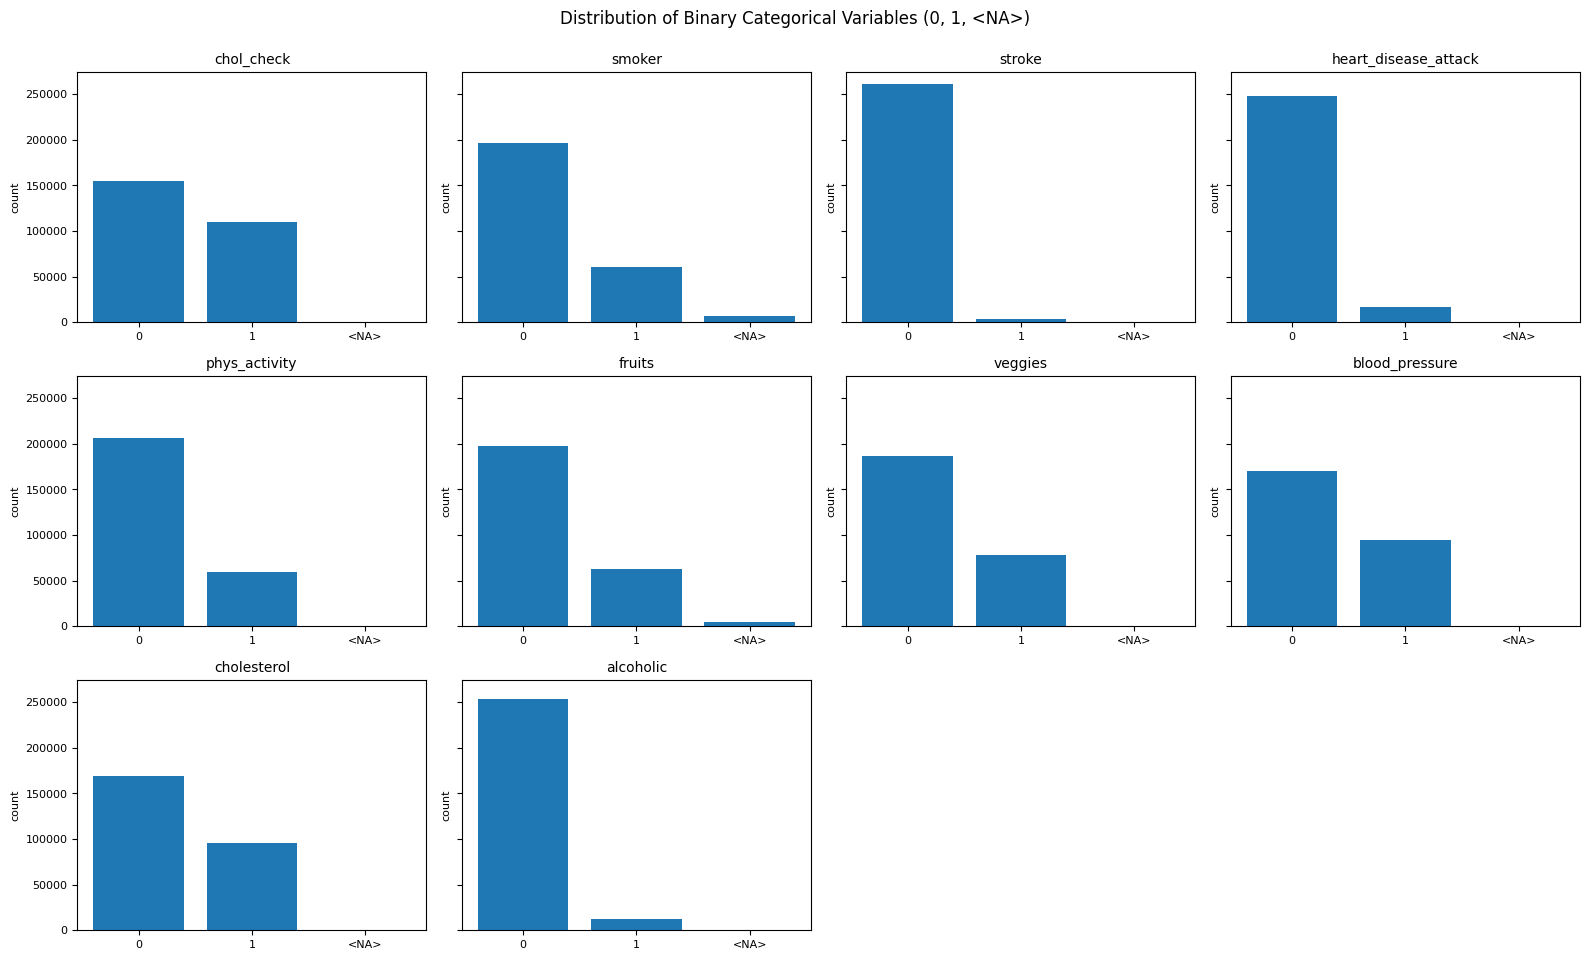

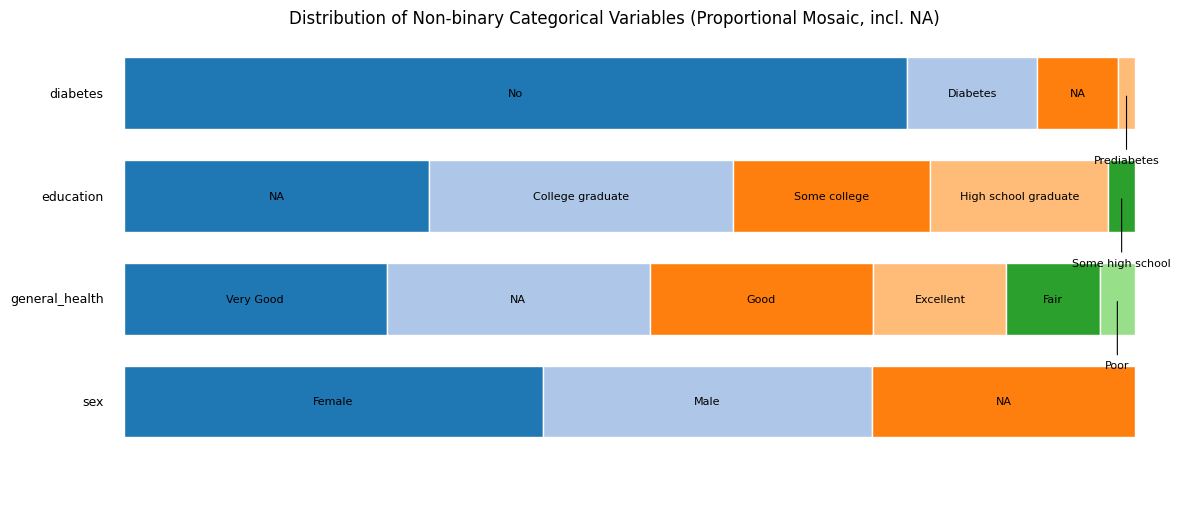

In [35]:
# 3.5 Distribution of Categorical Variables
# Plot 1: Faceted histograms for all binary variables (0, 1, <NA>) in one figure

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Expect an existing list of binary columns and a cleaned DataFrame
present_binary = [c for c in binary_cols if c in df_cleaned.columns]

if len(present_binary) > 0:
    n = len(present_binary)
    ncols = 4
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 3.2 * nrows), sharey=True)
    axes = np.array(axes).reshape(-1)  # flatten even if nrows*ncols == 1

    for ax, col in zip(axes, present_binary):
        s = df_cleaned[col]
        # count including NA explicitly
        counts = {
            "0": int((s == 0).sum()),
            "1": int((s == 1).sum()),
            "<NA>": int(s.isna().sum()),
        }
        x = ["0", "1", "<NA>"]
        y = [counts[k] for k in x]
        ax.bar(x, y)
        ax.set_title(col, fontsize=10, pad=6)
        ax.set_ylabel("count", fontsize=8)
        ax.tick_params(axis="x", labelrotation=0, labelsize=8)
        ax.tick_params(axis="y", labelsize=8)

    # remove unused axes
    for j in range(len(present_binary), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Distribution of Binary Categorical Variables (0, 1, <NA>)", fontsize=12, y=0.995)
    plt.tight_layout()
    plt.show()
else:
    print("No binary categorical variables to plot.")

# Plot 2: Mosaic-like (equal-width) strip with labels and leader lines; includes NA

present_multi = [c for c in nonbinary_cols if c in df_cleaned.columns]

if len(present_multi) > 0:
    cats_per_feature = []
    for c in present_multi:
        vals = df_cleaned[c].astype("string").fillna("NA").value_counts(normalize=True)
        cats_per_feature.append((c, vals))

    m = len(cats_per_feature)
    fig, ax = plt.subplots(figsize=(12, 0.8*m + 2))

    palette = plt.cm.tab20.colors
    palette_len = len(palette)

    for i, (feat, vals) in enumerate(cats_per_feature):
        x0 = 0
        for j, (cat, prop) in enumerate(vals.items()):
            w = prop  # proportional width
            color = palette[j % palette_len]
            rect = mpatches.Rectangle((x0, i), w, 0.7, facecolor=color, edgecolor="white")
            ax.add_patch(rect)

            # if wide enough, label inside; otherwise add leader line downward
            if w >= 0.07:
                ax.text(x0 + w/2, i + 0.35, cat, ha="center", va="center", fontsize=8, color="black")
            else:
                ax.annotate(
                    cat,
                    xy=(x0 + w/2, i + 0.35),
                    xytext=(x0 + w/2, i - 0.25),
                    ha="center", va="top", fontsize=8,
                    arrowprops=dict(arrowstyle="-", lw=0.8)
                )

            x0 += w

        # feature label
        ax.text(-0.02, i + 0.35, feat, ha="right", va="center", fontsize=9)

    ax.set_xlim(-0.05, 1.02)
    ax.set_ylim(-0.6, m - 0.1)
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
    ax.set_title("Distribution of Non-binary Categorical Variables (Proportional Mosaic, incl. NA)", fontsize=12, pad=10)

    plt.tight_layout()
    plt.show()
else:
    print("No non-binary categorical variables to plot.")



### **6. Missing Value Handling--Categorical variables**

**Part 1: Target variable (`diabetes`)**  
- Rows with missing values in the target variable were removed.  
- The number of deleted rows and their proportion of the dataset were reported.  

**Part 2: Binary categorical variables**  
- Applied one-hot encoding with an explicit `<NA>` category for each binary feature.  
- Original binary columns were dropped to avoid redundancy.  
- A summary table was generated showing counts and percentages for each level (0, 1, NA).  

**Part 3: Multi-class categorical variables (`education`, `general_health`, `sex`)**  
- Missing values were recoded as explicit categories:  
  - *education*: `"Unknown education"`  
  - *general_health*: `"Unknown health"`  
  - *sex*: `"Not reported"`  
- Categories representing less than **5%** of the dataset were merged into `"Other"`.  
- Final distributions were displayed, and an equal-width mosaic plot was used to visualize category levels after merging.  


In [36]:
# 3.6 Missing Value Handling

# Part 1: Target Variable (diabetes)

# Count rows before removal
before_rows = df_cleaned.shape[0]

# Remove rows with missing diabetes
df_cleaned = df_cleaned.dropna(subset=["diabetes"])

# Count rows after removal
after_rows = df_cleaned.shape[0]

# Calculate number and percentage removed
removed_rows = before_rows - after_rows
removed_pct = (removed_rows / before_rows) * 100

print(f"Rows removed due to missing 'diabetes': {removed_rows} "
      f"({removed_pct:.2f}% of total)")


Rows removed due to missing 'diabetes': 21184 (8.00% of total)


In [37]:
#Part 2: Binary categorical variables

# Choose the binary columns that are present
present_binary = [c for c in binary_cols if c in df_cleaned.columns]

# If no binary columns, exit early
if len(present_binary) == 0:
    print("No binary categorical variables found for one-hot with NA handling.")
else:
    # Build one-hot with an explicit NA category
    dummies = pd.get_dummies(
        df_cleaned[present_binary].astype("Int64"),
        columns=present_binary,
        dummy_na=True,            # create '=nan' indicators
        prefix=present_binary,    # use original column name as prefix
        prefix_sep="=",
        dtype="Int8"
    )

    # Normalize NA label to '=NA' (instead of '=nan') for clarity
    dummies.columns = [
        col.replace("=nan", "=NA") for col in dummies.columns
    ]

    # Concatenate back and drop original binary columns
    df_cleaned = pd.concat(
        [df_cleaned.drop(columns=present_binary), dummies],
        axis=1
    )

    # ---- Reporting / Outputs ----
    print(f"Processed binary variables: {len(present_binary)}")
    created_cols = sorted([c for c in dummies.columns])
    print("Created dummy columns:")
    print(created_cols)

    # Build a tidy summary: for each binary variable, counts & percents of 0/1/NA
    summary_rows = []
    n_rows = len(df_cleaned)

    for var in present_binary:
        c0 = f"{var}=0"
        c1 = f"{var}=1"
        cN = f"{var}=NA"

        # Some categories might be absent in data; guard with get()
        count0 = int(dummies.get(c0, pd.Series(0, index=dummies.index)).sum())
        count1 = int(dummies.get(c1, pd.Series(0, index=dummies.index)).sum())
        countN = int(dummies.get(cN, pd.Series(0, index=dummies.index)).sum())

        pct0 = 100.0 * count0 / n_rows if n_rows else 0.0
        pct1 = 100.0 * count1 / n_rows if n_rows else 0.0
        pctN = 100.0 * countN / n_rows if n_rows else 0.0

        summary_rows.append([var, "0", count0, f"{pct0:.2f}%"])
        summary_rows.append([var, "1", count1, f"{pct1:.2f}%"])
        summary_rows.append([var, "NA", countN, f"{pctN:.2f}%"])

    binary_onehot_summary = pd.DataFrame(
        summary_rows,
        columns=["Variable", "Level", "Count", "Percent"]
    )

    display(binary_onehot_summary)
# --- Drop original 10 binary variables explicitly ---
to_drop = [
    "chol_check", "smoker", "stroke", "heart_disease_attack",
    "phys_activity", "fruits", "veggies",
    "blood_pressure", "cholesterol", "alcoholic"
]
df_cleaned = df_cleaned.drop(columns=[c for c in to_drop if c in df_cleaned.columns])

print("Dropped original binary columns:", [c for c in to_drop if c not in df_cleaned.columns])


Processed binary variables: 10
Created dummy columns:
['alcoholic=0', 'alcoholic=1', 'alcoholic=<NA>', 'blood_pressure=0', 'blood_pressure=1', 'blood_pressure=<NA>', 'chol_check=0', 'chol_check=1', 'chol_check=<NA>', 'cholesterol=0', 'cholesterol=1', 'cholesterol=<NA>', 'fruits=0', 'fruits=1', 'fruits=<NA>', 'heart_disease_attack=0', 'heart_disease_attack=1', 'heart_disease_attack=<NA>', 'phys_activity=0', 'phys_activity=1', 'phys_activity=<NA>', 'smoker=0', 'smoker=1', 'smoker=<NA>', 'stroke=0', 'stroke=1', 'stroke=<NA>', 'veggies=0', 'veggies=1', 'veggies=<NA>']


,Variable,Level,Count,Percent
0,chol_check,0,142741,58.59%
1,chol_check,1,100870,41.41%
2,chol_check,NA,0,0.00%
3,smoker,0,180740,74.19%
4,smoker,1,56193,23.07%
5,smoker,NA,0,0.00%
6,stroke,0,239856,98.46%
7,stroke,1,3755,1.54%
8,stroke,NA,0,0.00%
9,heart_disease_attack,0,227747,93.49%


Dropped original binary columns: ['chol_check', 'smoker', 'stroke', 'heart_disease_attack', 'phys_activity', 'fruits', 'veggies', 'blood_pressure', 'cholesterol', 'alcoholic']


[education] merged to 'Other': ['Some high school']
[general_health] merged to 'Other': ['Poor']


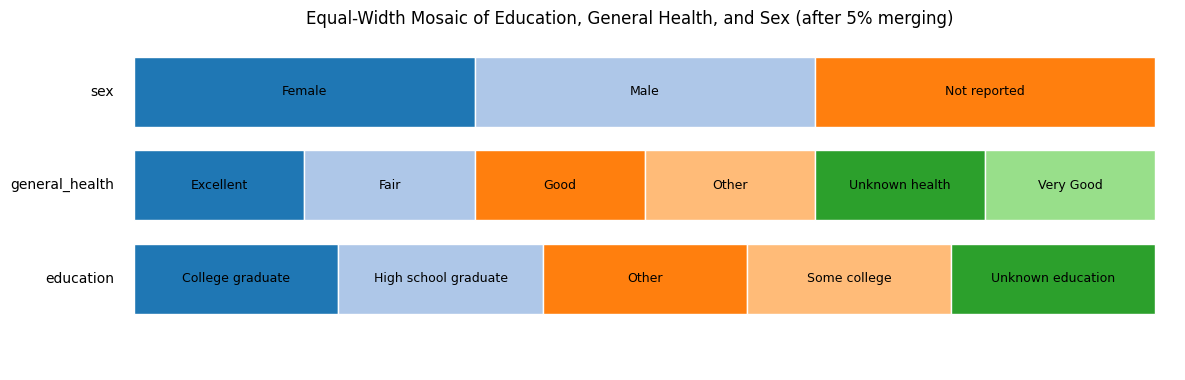

In [38]:
# Part 3: Multi-class categorical variables — clean, merge rare (5%), and plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 1) Fill NA with explicit categories
na_replacements = {
    "education": "Unknown education",
    "general_health": "Unknown health",
    "sex": "Not reported"
}
cols_target = [c for c in na_replacements.keys() if c in df_cleaned.columns]
for col in cols_target:
    df_cleaned[col] = df_cleaned[col].fillna(na_replacements[col])

# 2) Merge rare categories using a 5% threshold
threshold = int(0.05 * len(df_cleaned))
for col in cols_target:
    counts = df_cleaned[col].value_counts(dropna=False)
    rare_cats = counts[counts < threshold].index.tolist()
    if rare_cats:
        df_cleaned[col] = df_cleaned[col].replace(rare_cats, "Other")
        print(f"[{col}] merged to 'Other': {rare_cats}")


# 3) Equal-width mosaic / horizontal strip plot (includes all levels after merging)
cols_to_plot = [c for c in ["education", "general_health", "sex"] if c in df_cleaned.columns]
if len(cols_to_plot) == 0:
    print("No target categorical columns available for mosaic-like plotting.")
else:
    # collect unique levels per feature (strings), sorted for stable order
    feat_levels = []
    for c in cols_to_plot:
        levels = sorted(pd.Series(df_cleaned[c].astype(str).unique()).tolist())
        feat_levels.append((c, levels))

    m = len(feat_levels)
    fig_h = max(2.8, 0.9 * m + 1.2)
    fig, ax = plt.subplots(figsize=(12, fig_h))

    palette = plt.cm.tab20.colors
    k = len(palette)

    for i, (feat, levels) in enumerate(feat_levels):
        nlev = max(1, len(levels))
        row_y = i
        for j, cat in enumerate(levels):
            x0 = j / nlev
            w = 1.0 / nlev
            color = palette[j % k]
            rect = mpatches.Rectangle((x0, row_y), w, 0.75, facecolor=color, edgecolor="white")
            ax.add_patch(rect)

            # label inside if wide enough; otherwise use a leader line to a bottom label
            if w >= 0.09:
                ax.text(x0 + w/2, row_y + 0.375, cat, ha="center", va="center", fontsize=9, color="black")
            else:
                label_x = x0 + w/2
                label_y = row_y - 0.28
                ax.annotate(
                    cat,
                    xy=(label_x, row_y + 0.375),
                    xytext=(label_x, label_y),
                    ha="center", va="top", fontsize=8, color="black",
                    arrowprops=dict(arrowstyle="-", lw=0.8)
                )

        # feature name at the left
        ax.text(-0.02, row_y + 0.375, feat, ha="right", va="center", fontsize=10)

    # aesthetics
    ax.set_xlim(-0.05, 1.02)
    ax.set_ylim(-0.6, m - 0.05)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Equal-Width Mosaic of Education, General Health, and Sex (after 5% merging)", fontsize=12, pad=10)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()


### **7. Missing Value Handling — Numeric Variables**

- **Age & BMI**  
  - Missing values imputed using mean or median depending on skewness  
    (*|skewness| > 1 → median; otherwise mean*).  
  - *BMI* further transformed using **Box-Cox** (if strictly positive) or **Yeo-Johnson**.  

- **Income**  
  - Applied **Winsorization** at the 1st and 99th percentiles to reduce extreme outliers.  
  - Transformed with **Yeo-Johnson**, imputed missing values in the transformed space with the median,  
    and inverse-transformed back to the original scale.  

- **Visualization**  
  - Three histograms were generated to display the distributions of:  
    1. *Age (imputed)*  
    2. *BMI (transformed)*  
    3. *Income (transformed)*  


In [39]:
# 3.7 Numeric missing handling — Part 1: age & bmi

# Helper: choose mean vs median based on skewness (|skew| > 1 → median else mean)
def impute_by_skew(s: pd.Series) -> pd.Series:
    s_float = pd.to_numeric(s, errors="coerce")
    skew = s_float.dropna().skew()
    if pd.isna(skew):
        fill_val = s_float.median()
    else:
        fill_val = s_float.median() if abs(skew) > 1 else s_float.mean()
    return s_float.fillna(fill_val)

# Age imputation
if "age" in df_cleaned.columns:
    age_imputed = impute_by_skew(df_cleaned["age"])
    df_cleaned["age_imputed"] = age_imputed.round(0).astype(int)

# BMI imputation then transform (Box-Cox if strictly positive else Yeo-Johnson)
if "bmi" in df_cleaned.columns:
    bmi_imputed = impute_by_skew(df_cleaned["bmi"])
    use_boxcox = (bmi_imputed > 0).all()
    method = "box-cox" if use_boxcox else "yeo-johnson"

    pt_bmi = PowerTransformer(method=method, standardize=False)
    bmi_vals = bmi_imputed.values.reshape(-1, 1)
    bmi_transformed = pt_bmi.fit_transform(bmi_vals).ravel()

    df_cleaned["bmi_imputed"] = bmi_imputed.astype("Float64")
    df_cleaned["bmi_transformed"] = pd.Series(bmi_transformed, index=df_cleaned.index).astype("Float64")


In [40]:
# 3.7 Numeric missing handling — Part 2: income (Winsorization → Yeo-Johnson → impute → inverse)
from sklearn.preprocessing import PowerTransformer

if "income" in df_cleaned.columns:
    income = pd.to_numeric(df_cleaned["income"], errors="coerce")

    # Winsorize at 1st and 99th percentiles
    q_low, q_high = income.quantile([0.01, 0.99], interpolation="linear")
    income_wins = income.clip(lower=q_low, upper=q_high)

    # Fit Yeo-Johnson on non-missing
    pt_inc = PowerTransformer(method="yeo-johnson", standardize=False)
    mask_nonmiss = income_wins.notna()
    inc_fit = income_wins[mask_nonmiss].values.reshape(-1, 1)
    inc_trans = np.full((len(income_wins), 1), np.nan)
    inc_trans[mask_nonmiss] = pt_inc.fit_transform(inc_fit)

    # Impute missing in transformed space with median
    trans_median = np.nanmedian(inc_trans)
    inc_trans_imputed = np.where(np.isnan(inc_trans), trans_median, inc_trans)

    # Inverse-transform back to original scale
    inc_imputed = pt_inc.inverse_transform(inc_trans_imputed).ravel()

    # Save results
    df_cleaned["income_winsorized"] = pd.Series(income_wins.values, index=df_cleaned.index).astype("Float64")
    df_cleaned["income_imputed"] = pd.Series(inc_imputed, index=df_cleaned.index).astype("Float64")

    # Also keep the transformed (post-impute) values for modeling/diagnostics if needed
    df_cleaned["income_transformed"] = pd.Series(inc_trans_imputed.ravel(), index=df_cleaned.index).astype("Float64")
# After Winsorization, also fill NaNs with median (optional)
income_wins = income_wins.fillna(income_wins.median())
df_cleaned["income_winsorized"] = income_wins.astype("Float64")



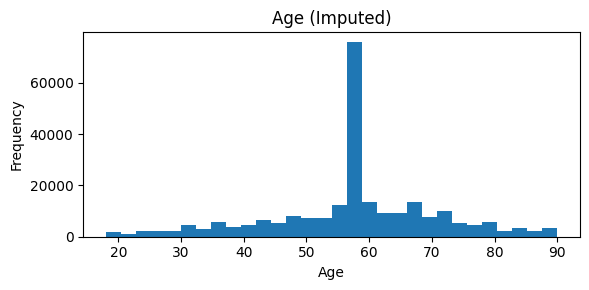

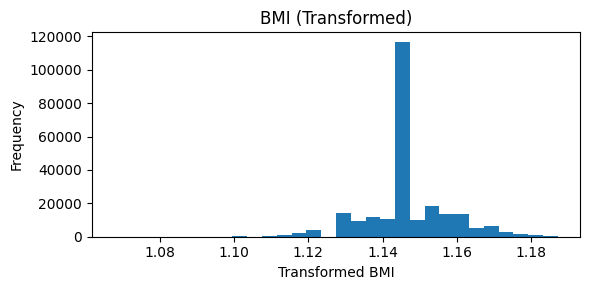

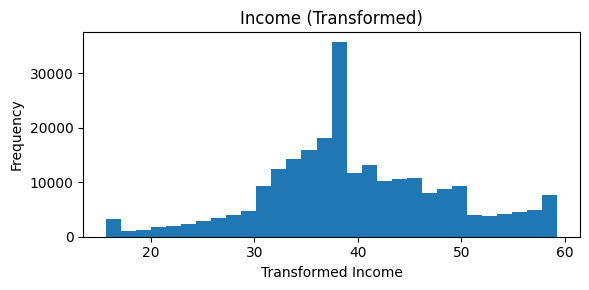

In [41]:
# 3.7 Numeric missing handling — Part 3: histograms
import matplotlib.pyplot as plt

# Age (imputed)
if "age_imputed" in df_cleaned.columns:
    plt.figure(figsize=(6, 3))
    plt.hist(df_cleaned["age_imputed"].dropna(), bins=30)
    plt.title("Age (Imputed)")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# BMI (transformed)
if "bmi_transformed" in df_cleaned.columns:
    plt.figure(figsize=(6, 3))
    plt.hist(df_cleaned["bmi_transformed"].dropna(), bins=30)
    plt.title("BMI (Transformed)")
    plt.xlabel("Transformed BMI")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Income (transformed, after winsorize + impute)
if "income_transformed" in df_cleaned.columns:
    plt.figure(figsize=(6, 3))
    plt.hist(df_cleaned["income_transformed"].dropna(), bins=30)
    plt.title("Income (Transformed)")
    plt.xlabel("Transformed Income")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [42]:
# Remove original numeric variables (age, bmi, income) after processing
cols_to_drop = [c for c in ["age", "bmi", "income"] if c in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

print("Dropped original columns:", cols_to_drop)
print("Remaining columns:", df_cleaned.columns.tolist()[:10], "...")


Dropped original columns: ['age', 'bmi', 'income']
Remaining columns: ['general_health', 'sex', 'education', 'diabetes', 'chol_check_missing', 'smoker_missing', 'stroke_missing', 'heart_disease_attack_missing', 'phys_activity_missing', 'fruits_missing'] ...


### **8. Exploratory Data Analysis (EDA)**

This section inspects the cleaned dataset before modeling.  
The dataset is exported for reproducibility, and four groups of variables are analyzed separately:  
1. **Target variable (`diabetes`)** – distribution check.  
2. **Binary categorical variables (only `=1` dummies)** – counts of 1 vs. 0.  
3. **Multi-class categorical variables (`education`, `general_health`, `sex`)** – proportional mosaic plots including NA/Other categories.  
4. **Numeric variables (only imputed: `age_imputed`, `bmi_imputed`, `income_imputed`)** – summary statistics, histograms, and boxplots.  

Additional checks include:  
- **Correlation heatmap** (numeric imputed + binary `=1` variables).  
- **Target associations**:  
  - Boxplots of numeric variables grouped by diabetes status.  
  - Stacked bar plots showing distribution of diabetes across binary variables.

Together, these outputs provide a clear overview of data quality, class balance, and feature relationships before modeling.


Groups ->
 target: diabetes
 binary(=1): 10 cols
 multiclass: ['education', 'general_health', 'sex']
 numeric(imputed only): ['age_imputed', 'bmi_imputed', 'income_imputed']


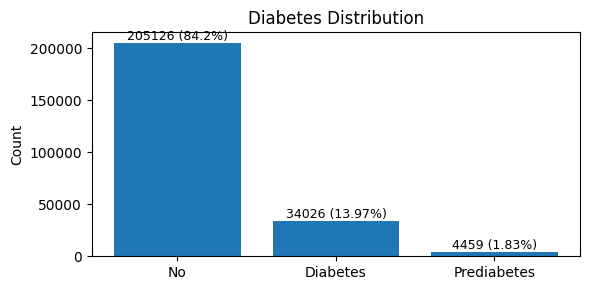

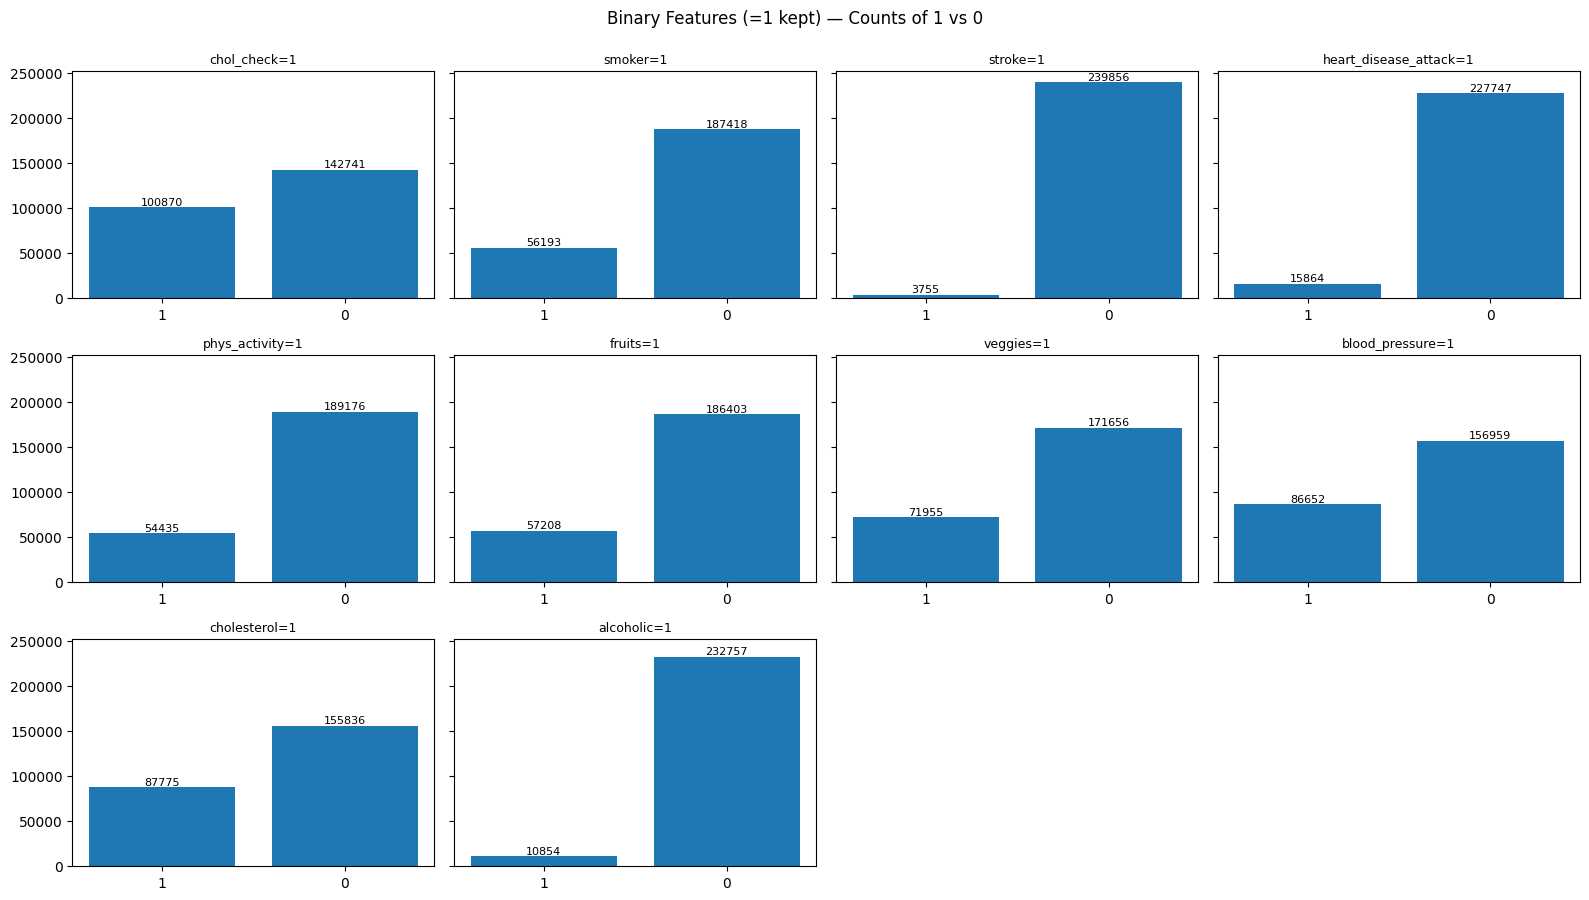

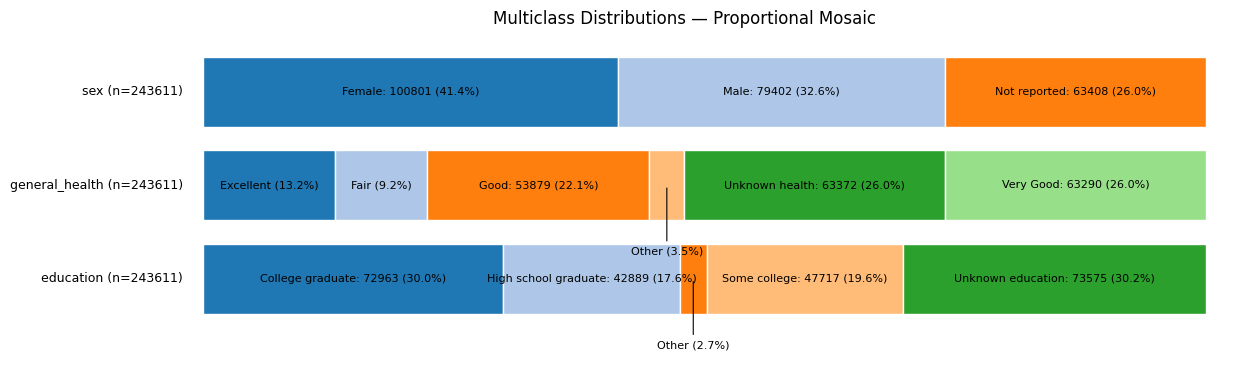

Numeric(imputed) columns: ['age_imputed', 'bmi_imputed', 'income_imputed']


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
age_imputed,243611.0,57.279191,13.370789,18.0,22.0,32.0,52.0,57.0,65.0,79.0,88.0,90.0
bmi_imputed,243611.0,27.784579,4.841297,12.0,19.0,21.0,26.0,27.0,29.0,37.0,46.0,60.0
income_imputed,243611.0,37150.614807,32670.008139,827.0,878.0,4353.0,15747.0,25041.0,47752.0,117358.0,143086.7,143583.28


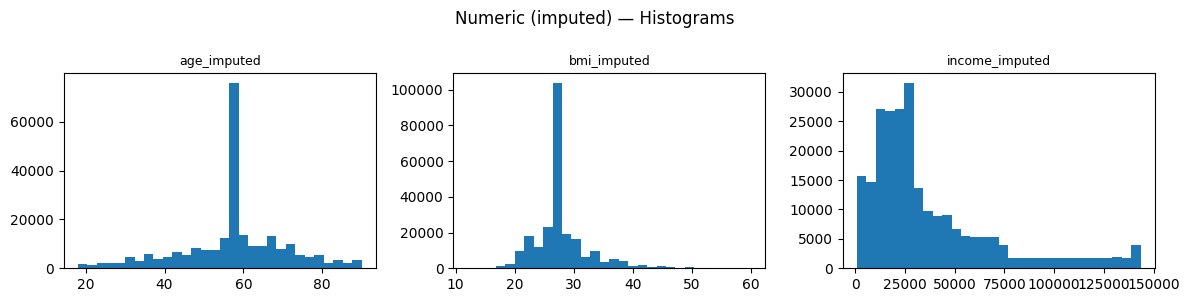

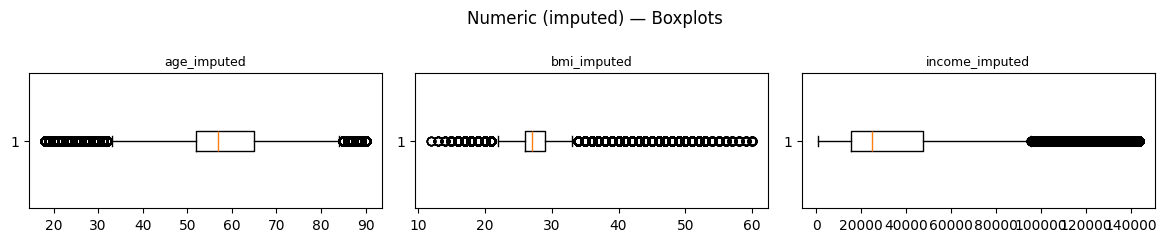

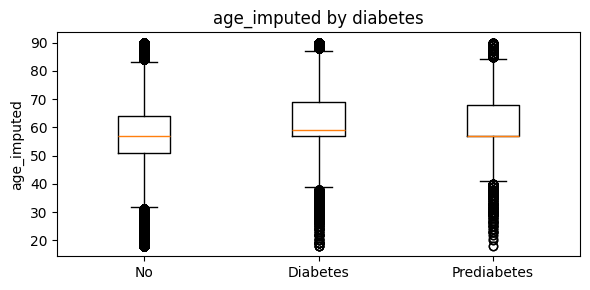

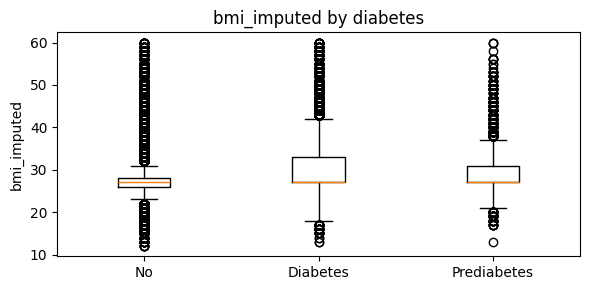

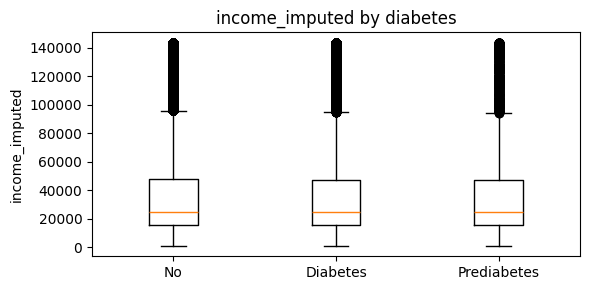

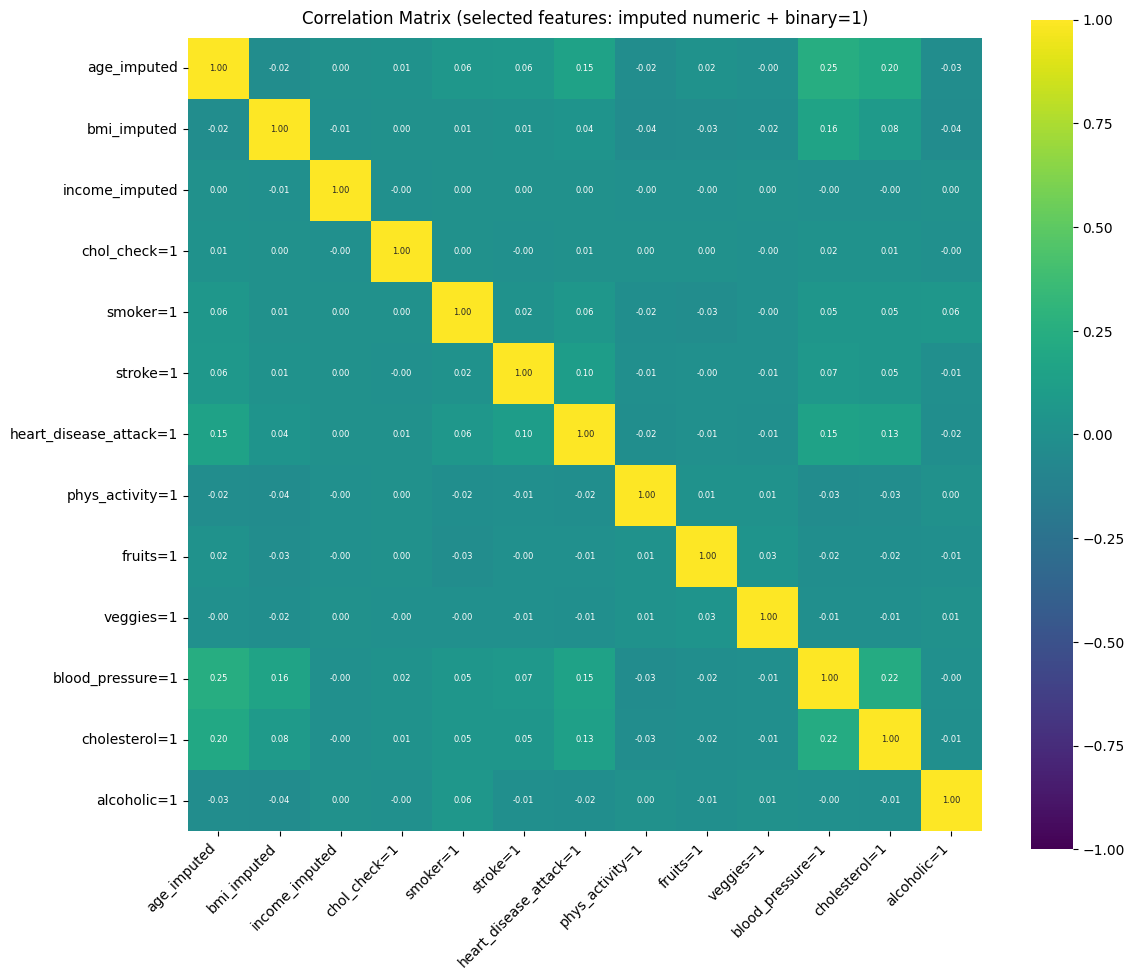

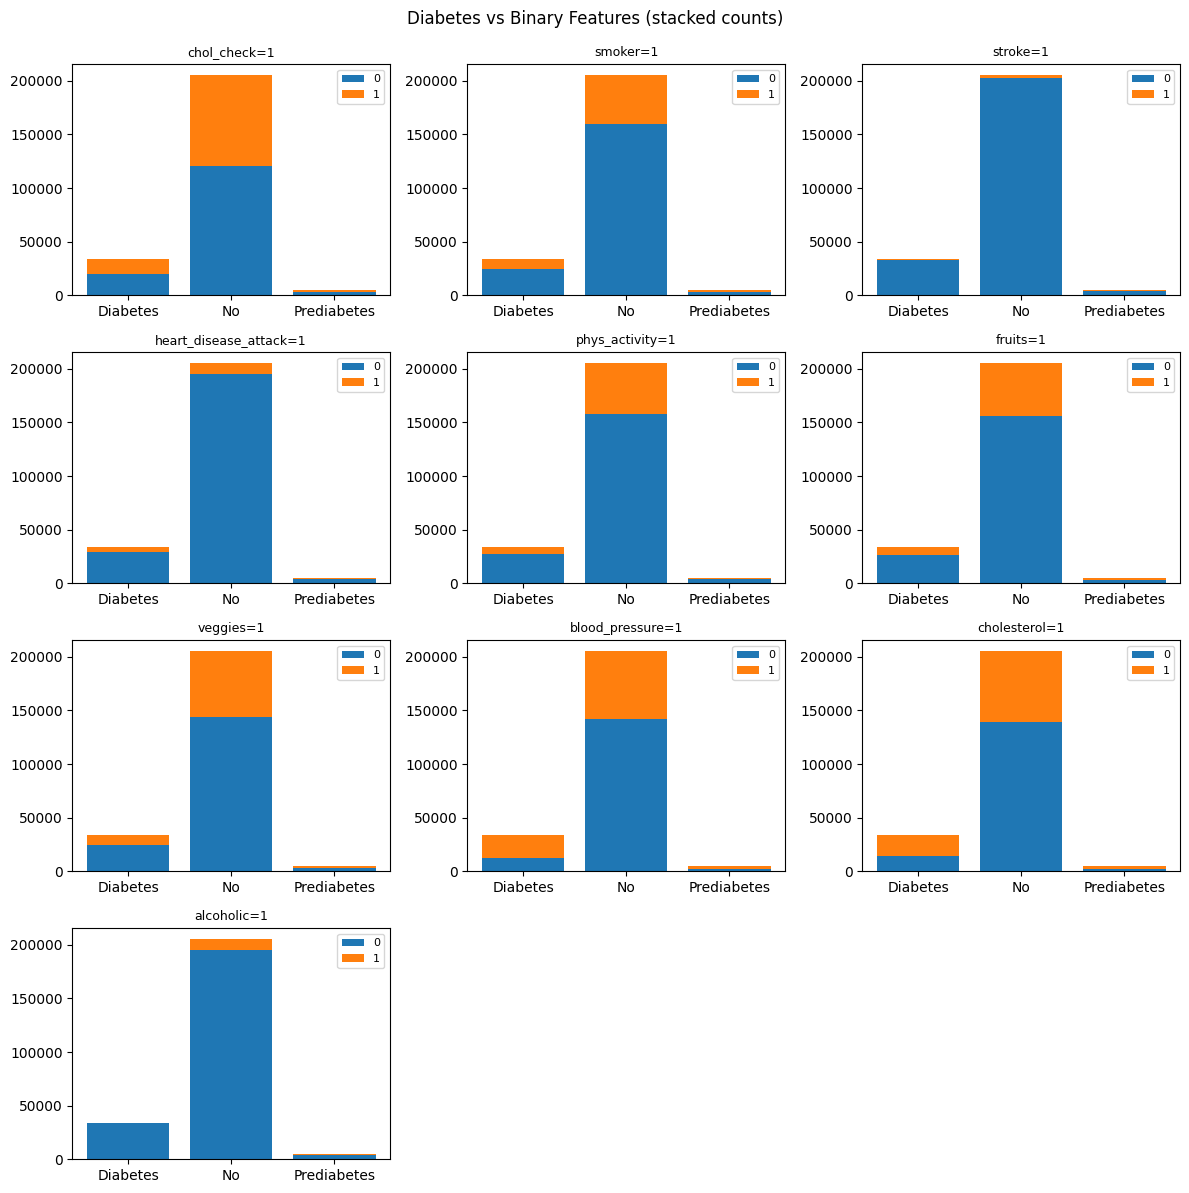

In [43]:
# 8. EDA 
#  0) Define variable groups (robust selection) ===
# choose working frame
dfW = globals().get("df_eda", globals().get("df_cleaned"))
assert isinstance(dfW, pd.DataFrame), "Provide df_eda or df_cleaned DataFrame."

# 1) target
target_col = "diabetes"
assert target_col in dfW.columns, "Target column 'diabetes' not found."

# 2) binary dummies: keep only '=1'
binary_1 = [
    c for c in dfW.columns
    if ("=" in c and c.endswith("=1"))
]
# If you also kept original 0/1 columns, you can intersect with a whitelist here.

# 3) multi-class (original string/category columns)
multiclass = [c for c in ["education", "general_health", "sex"] if c in dfW.columns]

# 4) numeric (imputed only for bmi/income; keep age_imputed too)
numeric_keep = [c for c in dfW.columns if pd.api.types.is_numeric_dtype(dfW[c])]
numeric_imputed = []
for c in numeric_keep:
    if ("bmi" in c or "income" in c):
        if c.endswith("_imputed"):
            numeric_imputed.append(c)
    elif c == "age_imputed":
        numeric_imputed.append(c)
# avoid duplicates
numeric_imputed = sorted(list(dict.fromkeys(numeric_imputed)))

print("Groups ->",
      f"\n target: {target_col}",
      f"\n binary(=1): {len(binary_1)} cols",
      f"\n multiclass: {multiclass}",
      f"\n numeric(imputed only): {numeric_imputed}", sep="")

#  1) Target variable distribution ===
vc = dfW[target_col].value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(2)

fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(vc.index.astype(str), vc.values)
ax.set_title("Diabetes Distribution")
ax.set_ylabel("Count")
for i, (x, v) in enumerate(zip(vc.index.astype(str), vc.values)):
    ax.text(i, v, f"{v} ({pct.loc[x]}%)", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

#  2) Binary(=1) variables: counts of 1 vs 0 ===
present_bin = [c for c in binary_1 if c in dfW.columns]
n = len(present_bin)
if n > 0:
    ncols = 4
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 3*nrows), sharey=True)
    axes = np.array(axes).reshape(-1)
    N = len(dfW)
    for ax, col in zip(axes, present_bin):
        ones = int(dfW[col].fillna(0).sum())
        zeros = N - ones
        ax.bar(["1","0"], [ones, zeros])
        ax.set_title(col, fontsize=9)
        for xi, yi in enumerate([ones, zeros]):
            ax.text(xi, yi, str(yi), ha="center", va="bottom", fontsize=8)
    for j in range(len(present_bin), len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle("Binary Features (=1 kept) — Counts of 1 vs 0", y=0.995, fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No binary =1 columns found.")

# === 3) Multiclass variables: proportional mosaic per feature ===
import matplotlib.patches as mpatches

cats = [c for c in multiclass if c in dfW.columns]
if cats:
    rows = []
    for col in cats:
        vc = dfW[col].fillna("NA").astype(str).value_counts(dropna=False)
        tot = int(vc.sum())
        items = [(k, int(v), float(v/tot)) for k, v in vc.sort_index().items()]
        rows.append((col, tot, items))

    m = len(rows)
    fig, ax = plt.subplots(figsize=(12.5, max(2.8, 0.9*m+1.2)))
    palette = plt.cm.tab20.colors
    k = len(palette)
    inside_thr, rich_thr = 0.08, 0.15

    for i, (feat, total_n, items) in enumerate(rows):
        y = i; x = 0.0
        for j, (lvl, cnt, prop) in enumerate(items):
            w = prop; color = palette[j % k]
            ax.add_patch(mpatches.Rectangle((x, y), w, 0.75, facecolor=color, edgecolor="white"))
            label = f"{lvl}: {cnt} ({prop*100:.1f}%)" if w >= rich_thr else f"{lvl} ({prop*100:.1f}%)"
            if w >= inside_thr:
                ax.text(x+w/2, y+0.375, label, ha="center", va="center", fontsize=8)
            else:
                ax.annotate(label, xy=(x+w/2, y+0.375), xytext=(x+w/2, y-0.28),
                            ha="center", va="top", fontsize=8,
                            arrowprops=dict(arrowstyle="-", lw=0.8))
            x += w
        ax.text(-0.02, y+0.375, f"{feat} (n={total_n})", ha="right", va="center", fontsize=9)

    ax.set_xlim(-0.06, 1.02); ax.set_ylim(-0.6, m-0.05)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title("Multiclass Distributions — Proportional Mosaic", fontsize=12, pad=10)
    for sp in ["top","right","left","bottom"]: ax.spines[sp].set_visible(False)
    plt.tight_layout(); plt.show()
else:
    print("No multiclass columns to plot.")

# === 4) Numeric (imputed only): summary + hist + box ===
nums = [c for c in numeric_imputed if c in dfW.columns]
print("Numeric(imputed) columns:", nums)

if nums:
    # summary
    desc = dfW[nums].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T
    display(desc)

    # histograms (faceted)
    n = len(nums); ncols = 3; nrows = (n + ncols - 1)//ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))
    axes = np.array(axes).reshape(-1)
    for ax, col in zip(axes, nums):
        ax.hist(dfW[col].dropna(), bins=30)
        ax.set_title(col, fontsize=9)
    for j in range(len(nums), len(axes)): fig.delaxes(axes[j])
    fig.suptitle("Numeric (imputed) — Histograms", y=0.99, fontsize=12)
    plt.tight_layout(); plt.show()

    # boxplots (faceted, horizontal)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2.4*nrows))
    axes = np.array(axes).reshape(-1)
    for ax, col in zip(axes, nums):
        ax.boxplot(dfW[col].dropna(), vert=False)
        ax.set_title(col, fontsize=9)
    for j in range(len(nums), len(axes)): fig.delaxes(axes[j])
    fig.suptitle("Numeric (imputed) — Boxplots", y=0.99, fontsize=12)
    plt.tight_layout(); plt.show()
# === 5) Numeric vs diabetes: grouped boxplots ===
if nums:
    for col in nums:
        fig, ax = plt.subplots(figsize=(6,3))
        groups = [dfW.loc[dfW[target_col]==lv, col].dropna() for lv in dfW[target_col].dropna().unique()]
        labels = [str(lv) for lv in dfW[target_col].dropna().unique()]
        ax.boxplot(groups, labels=labels, vert=True)
        ax.set_title(f"{col} by diabetes")
        ax.set_ylabel(col)
        plt.tight_layout(); plt.show()


# === 6) Correlation heatmap (numeric_imputed + binary =1 only) ===
import seaborn as sns

corr_cols = nums + [c for c in present_bin if c in dfW.columns]
corr = dfW[corr_cols].corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis",
            cbar=True, square=True, annot_kws={"size": 6},
            vmin=-1, vmax=1)
plt.title("Correlation Matrix (selected features: imputed numeric + binary=1)", fontsize=12, pad=10)
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

# === 7) Diabetes vs key binary(=1) variables: stacked bars ===
bin_for_compare = [c for c in present_bin if c in dfW.columns]
if bin_for_compare:
    n = len(bin_for_compare); ncols = 3; nrows = (n + ncols - 1)//ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, bin_for_compare):
        # derive original 0/1 from =1 dummy
        ones = dfW[col].fillna(0).astype(int)
        zeros = 1 - ones
        tab = pd.crosstab(dfW[target_col], ones, dropna=False)  # columns: 0/1
        # draw
        idx = tab.index.astype(str)
        ax.bar(idx, tab.get(0, pd.Series(0, index=idx)), label="0")
        ax.bar(idx, tab.get(1, pd.Series(0, index=idx)), bottom=tab.get(0, pd.Series(0, index=idx)), label="1")
        ax.set_title(col, fontsize=9); ax.legend(fontsize=8)
    for j in range(len(bin_for_compare), len(axes)): fig.delaxes(axes[j])
    fig.suptitle("Diabetes vs Binary Features (stacked counts)", y=0.99, fontsize=12)
    plt.tight_layout(); plt.show()


### **9. Cleaned Dataset Export**

The cleaned dataset is exported as **`cleaned_datasetB.csv`** for further analysis.


In [44]:
# Export the cleaned dataset to CSV
df_cleaned.to_csv("cleaned_datasetB.csv", index=False)

print("Export completed: cleaned_datasetB.csv")


Export completed: cleaned_datasetB.csv


## Step 4:Exploratory Data Analysis

### **1. Numerical Features: Age and BMI**

- **Age (imputed)** and **BMI (transformed)** were selected as numerical features.  
- **Histograms** were used to explore the individual distributions of both variables.  
- A **scatterplot** illustrated the joint distribution of Age and BMI, with points colored by diabetes status.  
- A **correlation heatmap** examined their linear relationship.  
- A **t-test** was conducted to check whether BMI differs significantly between diabetic and non-diabetic individuals.  


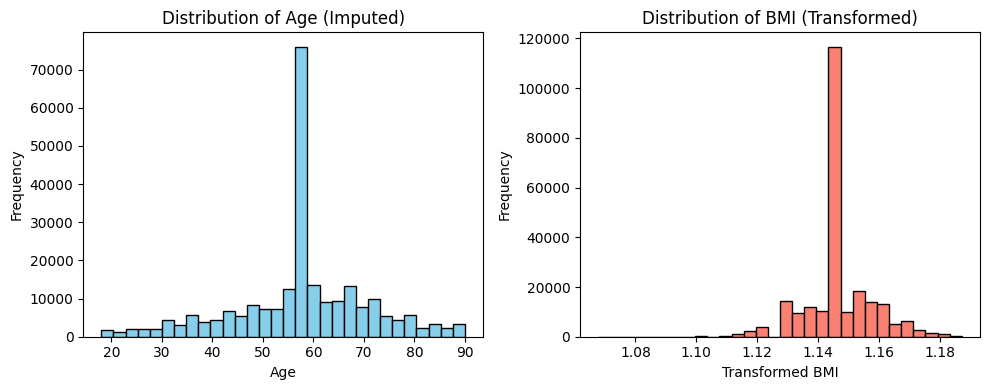

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


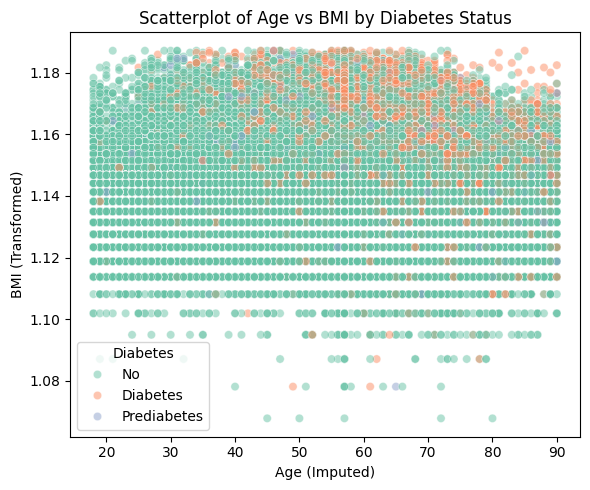

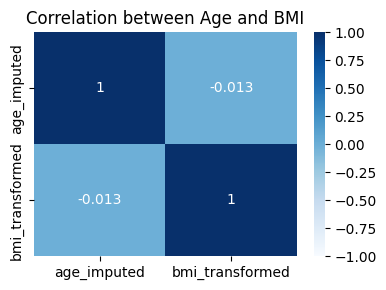

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 1) Histograms of Age and BMI
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df_cleaned["age_imputed"].dropna(), bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Age (Imputed)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

axes[1].hist(df_cleaned["bmi_transformed"].dropna(), bins=30, color="salmon", edgecolor="black")
axes[1].set_title("Distribution of BMI (Transformed)")
axes[1].set_xlabel("Transformed BMI")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2) Scatterplot (Age vs BMI), colored by diabetes
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x="age_imputed", y="bmi_transformed",
    hue="diabetes",
    data=df_cleaned, alpha=0.5, palette="Set2"
)
plt.title("Scatterplot of Age vs BMI by Diabetes Status")
plt.xlabel("Age (Imputed)")
plt.ylabel("BMI (Transformed)")
plt.legend(title="Diabetes")
plt.tight_layout()
plt.show()

# 3) Correlation heatmap
corr_vars = df_cleaned[["age_imputed", "bmi_transformed"]].corr(method="pearson")
plt.figure(figsize=(4, 3))
sns.heatmap(corr_vars, annot=True, cmap="Blues", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation between Age and BMI")
plt.tight_layout()
plt.show()




In [46]:

# 4) T-test for BMI difference between diabetic vs non-diabetic
# Keep only rows with BMI and valid diabetes label (No vs Diabetes)
subset = df_cleaned.dropna(subset=["bmi_transformed", "diabetes"])
group_no = subset.loc[subset["diabetes"] == "No", "bmi_transformed"]
group_yes = subset.loc[subset["diabetes"] == "Diabetes", "bmi_transformed"]

t_stat, p_val = ttest_ind(group_no, group_yes, equal_var=False, nan_policy="omit")

print("T-test for BMI difference (Diabetes vs No Diabetes):")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

mean_no = group_no.mean()
std_no = group_no.std()
mean_yes = group_yes.mean()
std_yes = group_yes.std()

# Mean difference
mean_diff = mean_yes - mean_no

# Cohen's d
n_no, n_yes = len(group_no), len(group_yes)
pooled_std = np.sqrt(((n_no-1)*std_no**2 + (n_yes-1)*std_yes**2) / (n_no+n_yes-2))
cohen_d = mean_diff / pooled_std

print(f"No Diabetes: mean={mean_no:.2f}, std={std_no:.2f}, n={n_no}")
print(f"Diabetes: mean={mean_yes:.2f}, std={std_yes:.2f}, n={n_yes}")
print(f"Mean difference = {mean_diff:.2f}")
print(f"Cohen's d = {cohen_d:.2f}")


T-test for BMI difference (Diabetes vs No Diabetes):
t-statistic = -89.737, p-value = 0.0000
No Diabetes: mean=1.15, std=0.01, n=205126
Diabetes: mean=1.15, std=0.01, n=34026
Mean difference = 0.01
Cohen's d = 0.54


### **2. Categorical Features: General Health and Sex**

- **General Health** (Excellent, Very Good, Good, Fair, Other, Unknown health)  
- **Sex** (Male, Female, Not reported)  

**Analysis steps:**  
1. Bar plots to examine the overall distribution of each categorical variable.  
2. Grouped bar plots to compare distributions across diabetes status.  
3. Chi-square tests to evaluate whether these categorical features are significantly associated with diabetes status.  


/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/1939104315.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="general_health", data=df_cleaned, order=df_cleaned["general_health"].value_counts().index, ax=axes[0], palette="Set2")
/var/folders/jv/nkc1qm1d5yzbtb06746qtlpr0000gn/T/ipykernel_19444/1939104315.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df_cleaned, order=df_cleaned["sex"].value_counts().index, ax=axes[1], palette="Set3")


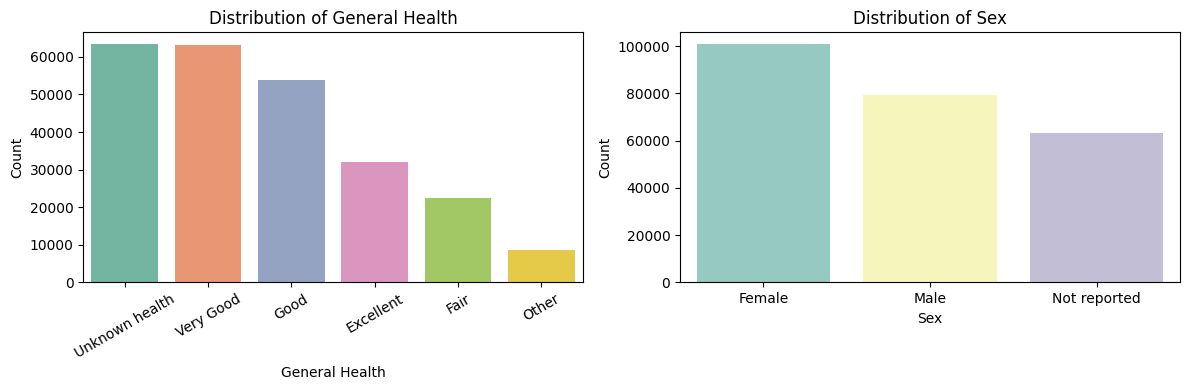

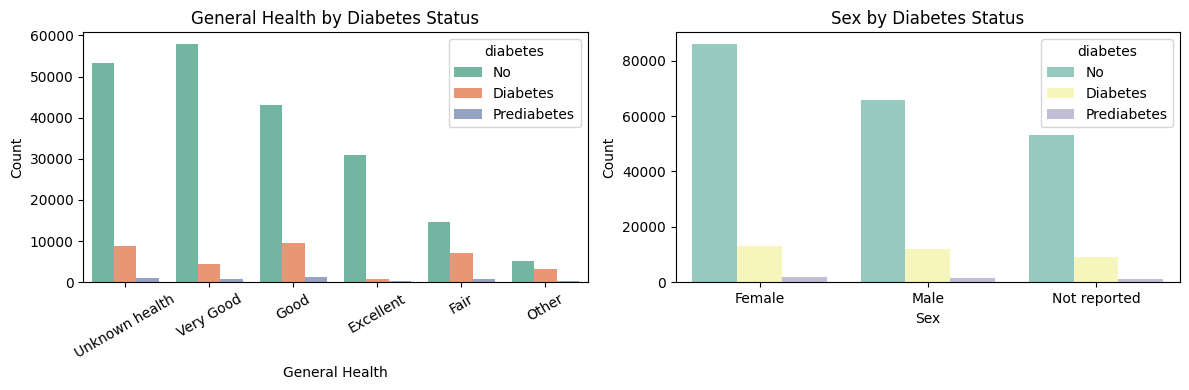

Chi-square test for General Health vs Diabetes:
Chi2 = 17284.10, p-value = 0.0000

Chi-square test for Sex vs Diabetes:
Chi2 = 184.32, p-value = 0.0000


In [47]:
# 4.2 Categorical Features — Percentage bars and Mosaic plots with labels (EN-only code)


# 1) Overall distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="general_health", data=df_cleaned, order=df_cleaned["general_health"].value_counts().index, ax=axes[0], palette="Set2")
axes[0].set_title("Distribution of General Health")
axes[0].set_xlabel("General Health")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(x="sex", data=df_cleaned, order=df_cleaned["sex"].value_counts().index, ax=axes[1], palette="Set3")
axes[1].set_title("Distribution of Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 2) Grouped distributions by Diabetes status
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="general_health", hue="diabetes", data=df_cleaned, order=df_cleaned["general_health"].value_counts().index, ax=axes[0], palette="Set2")
axes[0].set_title("General Health by Diabetes Status")
axes[0].set_xlabel("General Health")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(x="sex", hue="diabetes", data=df_cleaned, order=df_cleaned["sex"].value_counts().index, ax=axes[1], palette="Set3")
axes[1].set_title("Sex by Diabetes Status")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 3) Chi-square tests
# General health vs diabetes
contingency_health = pd.crosstab(df_cleaned["general_health"], df_cleaned["diabetes"])
chi2_h, p_h, dof_h, exp_h = chi2_contingency(contingency_health)

# Sex vs diabetes
contingency_sex = pd.crosstab(df_cleaned["sex"], df_cleaned["diabetes"])
chi2_s, p_s, dof_s, exp_s = chi2_contingency(contingency_sex)

print("Chi-square test for General Health vs Diabetes:")
print(f"Chi2 = {chi2_h:.2f}, p-value = {p_h:.4f}")

print("\nChi-square test for Sex vs Diabetes:")
print(f"Chi2 = {chi2_s:.2f}, p-value = {p_s:.4f}")


### **3. Summary of EDA Findings and Tests**  
This step integrates results from statistical analyses of selected features.  
- **BMI (transformed):** Welch’s t-test was applied to compare groups by diabetes status, with effect size (Cohen’s d) calculated.  
- **Age (imputed):** Descriptive EDA was performed to characterize the distribution without formal testing.  
- **General Health & Sex:** Chi-square tests were conducted to evaluate associations with diabetes status.  
The results are consolidated into a summary table.  


In [48]:

# --- Safety: filter required columns if present ---
features_available = {
    "age_imputed": "Age (imputed)",
    "bmi_transformed": "BMI (transformed)",
    "general_health": "General Health",
    "sex": "Sex",
    "diabetes": "Diabetes"
}
for c in ["age_imputed", "bmi_transformed", "general_health", "sex", "diabetes"]:
    if c not in df_cleaned.columns:
        raise ValueError(f"Required column missing: {c}")

# --- 1) BMI: t-test (Diabetes vs No) + Cohen's d ---
subset_bmi = df_cleaned.dropna(subset=["bmi_transformed", "diabetes"])
group_no = subset_bmi.loc[subset_bmi["diabetes"] == "No", "bmi_transformed"]
group_yes = subset_bmi.loc[subset_bmi["diabetes"] == "Diabetes", "bmi_transformed"]
t_stat, p_val = ttest_ind(group_no, group_yes, equal_var=False, nan_policy="omit")
n_no, n_yes = len(group_no), len(group_yes)
std_no, std_yes = group_no.std(), group_yes.std()
pooled_std = np.sqrt(((n_no - 1) * std_no**2 + (n_yes - 1) * std_yes**2) / (n_no + n_yes - 2))
cohen_d = (group_yes.mean() - group_no.mean()) / pooled_std

# --- 2) Chi-square: General Health vs Diabetes ---
cont_health = pd.crosstab(df_cleaned["general_health"], df_cleaned["diabetes"])
chi2_h, p_h, dof_h, exp_h = chi2_contingency(cont_health)

# --- 3) Chi-square: Sex vs Diabetes ---
cont_sex = pd.crosstab(df_cleaned["sex"], df_cleaned["diabetes"])
chi2_s, p_s, dof_s, exp_s = chi2_contingency(cont_sex)

# --- 4) Age: descriptive (EDA only) ---
age_desc = df_cleaned["age_imputed"].describe()

# --- Build summary table ---
rows = [
    {
        "Feature": "BMI (transformed)",
        "Type": "Numerical",
        "Method": "Two-sample t-test (Welch)",
        "Statistic": f"t = {t_stat:.2f}",
        "p-value": f"{p_val:.4g}",
        "Effect/Note": f"Cohen's d = {cohen_d:.2f}",
        "Conclusion": "Significant difference between diabetes groups"
    },
    {
        "Feature": "Age (imputed)",
        "Type": "Numerical",
        "Method": "Descriptive EDA",
        "Statistic": f"mean = {age_desc['mean']:.2f}",
        "p-value": "—",
        "Effect/Note": f"std = {age_desc['std']:.2f}",
        "Conclusion": "Distribution characterized; no formal test reported"
    },
    {
        "Feature": "General Health",
        "Type": "Categorical",
        "Method": "Chi-square test",
        "Statistic": f"χ² = {chi2_h:.2f}",
        "p-value": f"{p_h:.4g}",
        "Effect/Note": f"df = {dof_h}",
        "Conclusion": "Strong association with diabetes status"
    },
    {
        "Feature": "Sex",
        "Type": "Categorical",
        "Method": "Chi-square test",
        "Statistic": f"χ² = {chi2_s:.2f}",
        "p-value": f"{p_s:.4g}",
        "Effect/Note": f"df = {dof_s}",
        "Conclusion": "Weaker but significant association"
    }
]
summary_43 = pd.DataFrame(rows)
display(summary_43)


,Feature,Type,Method,Statistic,p-value,Effect/Note,Conclusion
0,BMI (transformed),Numerical,Two-sample t-test (Welch),t = -89.74,0,Cohen's d = 0.54,Significant difference between diabetes groups
1,Age (imputed),Numerical,Descriptive EDA,mean = 57.28,—,std = 13.37,Distribution characterized; no formal test rep...
2,General Health,Categorical,Chi-square test,χ² = 17284.10,0,df = 10,Strong association with diabetes status
3,Sex,Categorical,Chi-square test,χ² = 184.32,8.789e-39,df = 4,Weaker but significant association
